# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Данные состоят из 23699 объявлений, содержащих следующие сведения:
- `'airports_nearest'` — расстояние до ближайшего аэропорта в метрах (м)
- `'balcony'` — число балконов
- `'ceiling_height'` — высота потолков (м)
- `'cityCenters_nearest'` — расстояние до центра города (м)
- `'days_exposition'` — сколько дней было размещено объявление (от публикации до снятия)
- `'first_day_exposition'` — дата публикации
- `'floor'` — этаж
- `'floors_total'` — всего этажей в доме
- `'is_apartment'` — апартаменты (булев тип)
- `'kitchen_area'` — площадь кухни в квадратных метрах (м²)
- `'last_price'` — цена на момент снятия с публикации
- `'living_area'` — жилая площадь в квадратных метрах (м²)
- `'locality_name'` — название населённого пункта
- `'open_plan'` — свободная планировка (булев тип)
- `'parks_around3000'` — число парков в радиусе 3 км
- `'parks_nearest'` — расстояние до ближайшего парка (м)
- `'ponds_around3000'` — число водоёмов в радиусе 3 км
- `'ponds_nearest'` — расстояние до ближайшего водоёма (м)
- `'rooms'` — число комнат
- `'studio'` — квартира-студия (булев тип)
- `'total_area'` — общая площадь квартиры в квадратных метрах (м²)
- `'total_images'` — число фотографий квартиры в объявлении

Исследование содержит следующие этапы:
- ознакомление с исходными данными
- предобработка данных
    - обработка пропусков
    - удаление аномальных и редких значений
    - изменение типов данных
    - обработка дубликатов
    - категоризация данных
    - добавление в таблицу новых данных для анализа
- выявление закономерностей и зависимостей, визуализация
- составление итогового вывода

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импорт бибилиотек

import pandas as pd
import re
import os
import matplotlib.pyplot as plt

In [2]:
# считывание данных из файла, создание датафрейма

path1 = '/datasets/real_estate_data.csv'
path2 = 'real_estate_data.csv'

if os.path.exists(path1):
     data = pd.read_csv(path1, sep='\t')
elif os.path.exists(path2):
     data = pd.read_csv(path2, sep='\t')
else:
     print('File is missing')
        
pd.set_option('display.max_columns', 50)

In [3]:
# просмотр данных

data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# получение общей информации о датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

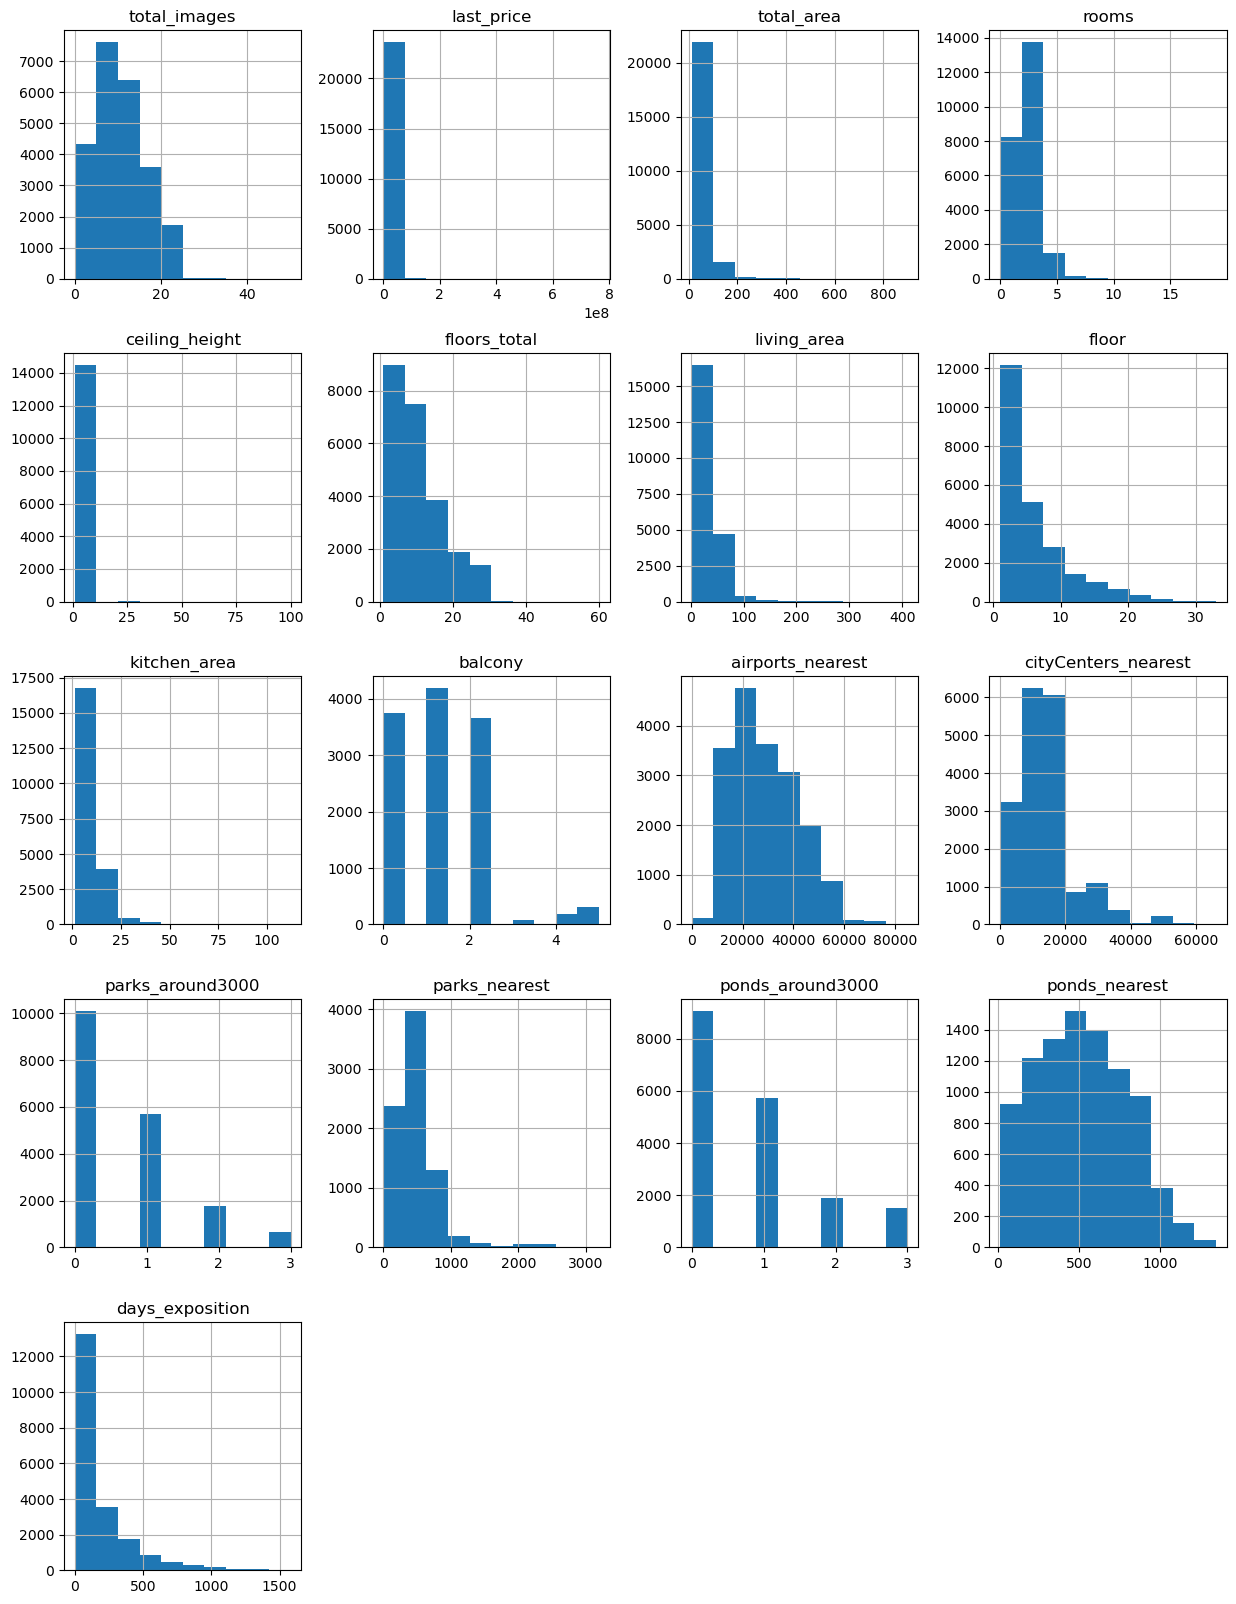

In [5]:
# построение общей гистограммы для всех числовых столбцов

data.hist(figsize=(15, 20))
None

Обзор исходных данных показал необходимость выполнения следующих действий:
- обработка пропусков в стоблцах:
    - `'airports_nearest'` (заполним пропуски медианным расстоянием до ближайшего аэропорта по каждому населенному пункту)
    - `'balcony'` (заполним пропуски 0)
    - `'ceiling_height'` (заполним пропуски медианной высотой потолка)
    - `'cityCenters_nearest'` (заполним пропуски медианным расстоянием до центра города по каждому населенному пункту)
    - `'is_apartment'` (заполним пропуски значением False)
    - `'kitchen_area'`(рассчитаем мединный коэффициент площади кухни по всей таблице, заполним пропуски отношением общей площади и этого коэффициента)
    - `'living_area'`(рассчитаем мединный коэффициент жилой площади по всей таблице, заполним пропуски отношением общей площади и этого коэффициента)
    - `'parks_around3000'` (заполним пропуски медианным количеством парков в радиусе 3 км от квартиры по каждому населенному пункту)
    - `'parks_nearest'` (заполним пропуски медианным расстоянием до ближайшего парка по каждому населенному пункту)
    - `'ponds_around3000'` (заполним пропуски медианным количеством  водоемов в радиусе 3 км от квартиры по каждому населенному пункту)
    - `'ponds_nearest'`(заполним пропуски медианным расстоянием до ближайшего водоема по каждому населенному пункту)
    
    
- удаление аномальных значений в столбцах:
    - `'ceiling_height'`
    - `'floors_total'`
    - `'kitchen_area'`
    - `'last_price'`
    - `'living_area'`
    - `'rooms'`
    - `'total_area'`
    
Кроме того, детально будут рассмотрены все столбцы для выявления неявных дубликатов и необходимости изменения типов данных.

### Предобработка данных

Предобработка данных включает следующие шаги:
- заполнение пропусков
- обработка аномальных значений
- изменение типов данных
- обработка дубликатов
- категоризация данных

In [6]:
# ищем явные дубликаты

data.duplicated().sum()

0

In [7]:
# вычислим количество и процент пропущенных данных в каждом столбце

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
((data.isna().sum() / len(data)) * 100).round(2)

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

Явных дубликатов в датафрейме нет, а многие столбцы содержат пропуски (от 0,21 до 88,29%). Дальнейшая работа будет построена следующим образом: мы  по очереди изучим каждый столбец и обработаем данные в нем. Наша цель - потерять не более 10% данных после обработки. В конце еще раз посмотрим на общую информацию по всему датафрейму.

#### Столбец `'total_images'`
Количество фотографий квартиры в объявлении может повлиять на длительность продажи (объявления без фотографий или с небольшим количеством вызывают меньше доверия у покупателей), но вряд ли может напрямую влиять на общую стоимость объекта недвижимости. Пропусков в данном столбце нет, оставим его без изменений.

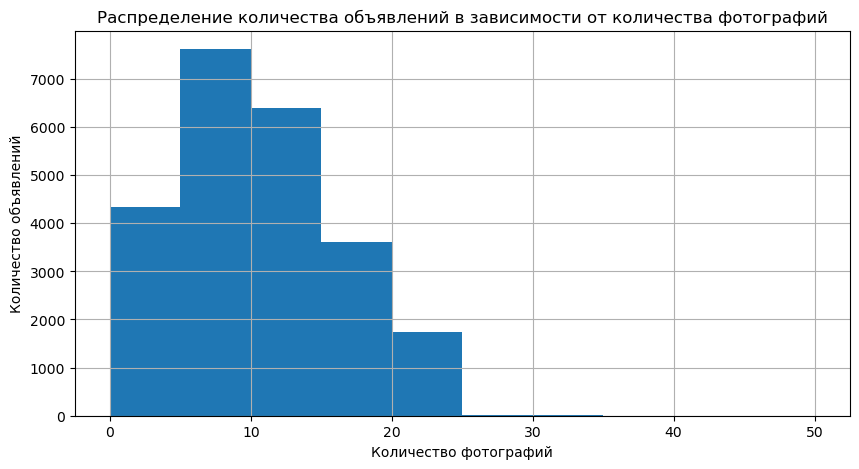

In [9]:
data['total_images'].hist(figsize=(10, 5))
plt.xlabel('Количество фотографий')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от количества фотографий')
plt.show()

В большинстве объявлений содержится от 5 до 10 фотографий.

#### Столбец `'last_price'`

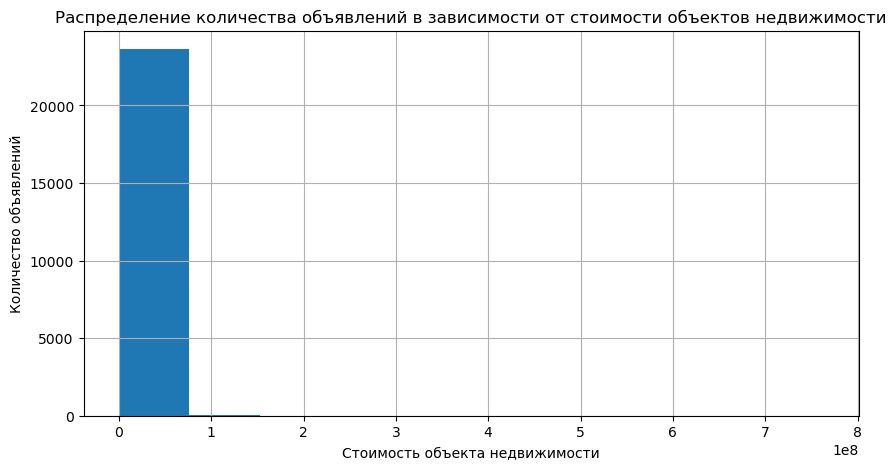

In [10]:
data['last_price'].hist(figsize=(10, 5))
plt.xlabel('Стоимость объекта недвижимости')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от стоимости объектов недвижимости')
plt.show()

In [11]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Мы видим, что данные содержат как слишком высокие значения, так и явно заниженные. Сначала обработаем слишком высокие значения.

Гистограмма показывает, что стоимость подавляющего большинства квартир в датафрейме не превышает 15000000. Примем верхнюю границу в 20 миллионов и посчитаем, какую долю в процентах от общего числа составляют данные со значением стоимости выше этой величины.

In [12]:
(len(data.query('last_price > 20000000')) / len(data)) * 100

2.983248238322292

Процент потерь составит 2,98%, что входит в рамки установленного лимита.

In [13]:
data = data.query('last_price <= 20000000')

Посмотрим еще раз на гистограмму

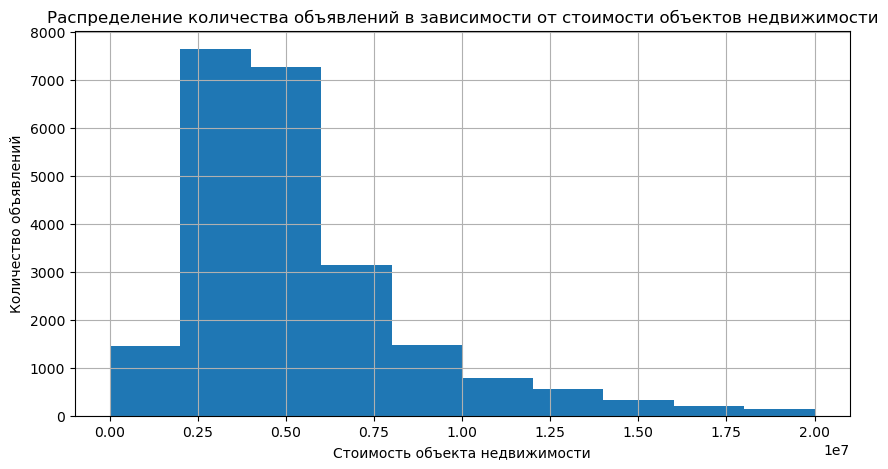

In [14]:
data['last_price'].hist(figsize=(10, 5))
plt.xlabel('Стоимость объекта недвижимости')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от стоимости объектов недвижимости')
plt.show()

Гистограмма показывает, что в датафрейме есть данные о некотором количестве квартир дешевле 20000000. Слишком низкие цены могут объясняться либо ошибкой заполнения данных (продавец забыли приписать еще один 0 к цене), либо расположением квартиры (например, в малом населенном пункте). Минимальная цена при этом составляет 12190, что не может соответствовать реальности и является явной аномалией. 

Примем нижнюю границу в 1000000. Таким образом, мы исключим и строки с потенциально ошибочными данными, и с аномально низкими ценами. Предварительно оценим процент потерь.

In [15]:
(len(data.query('last_price < 1000000')) / len(data)) * 100

0.9786012526096033

Потери составят менее 1 процента данных.

In [16]:
data = data.query('last_price >= 1000000')

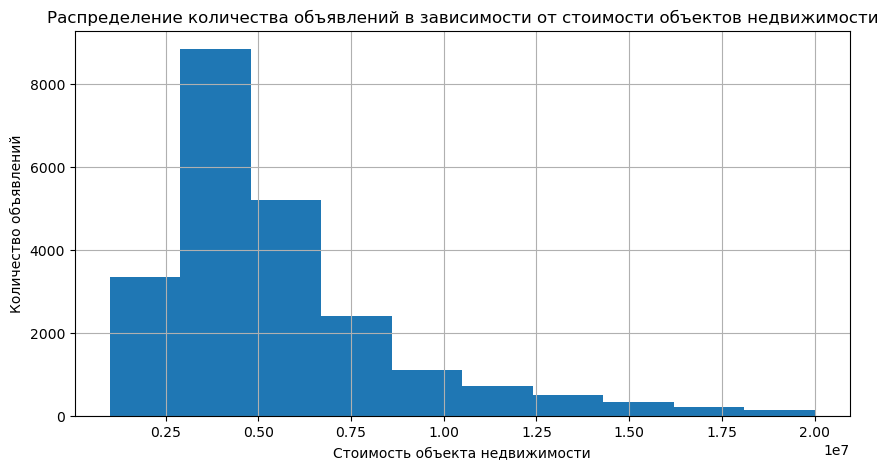

In [17]:
data['last_price'].hist(figsize=(10, 5))
plt.xlabel('Стоимость объекта недвижимости')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от стоимости объектов недвижимости')
plt.show()

Стоимость большинства представленных квартир на рынке варьируется между 2,5 и 5 млн.

#### Столбец `'total_area'`

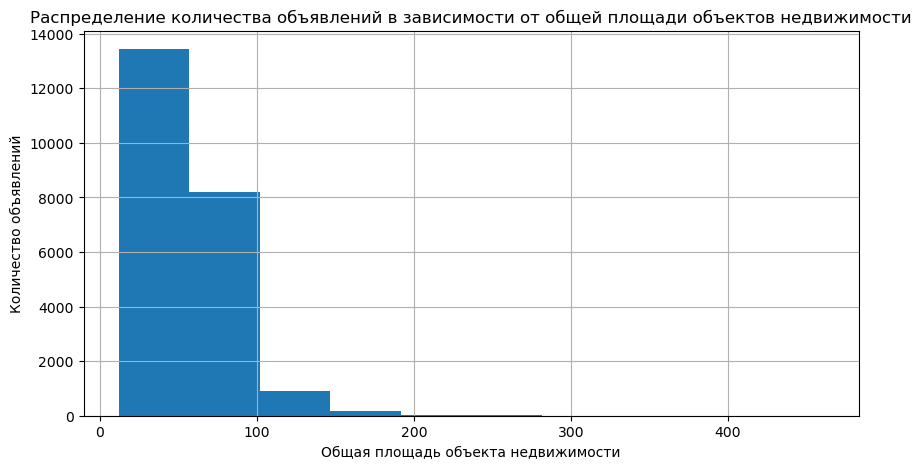

In [18]:
data['total_area'].hist(figsize=(10, 5))
plt.xlabel('Общая площадь объекта недвижимости')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от общей площади объектов недвижимости')
plt.show()

In [19]:
data['total_area'].describe()

count    22767.000000
mean        56.882219
std         24.860001
min         12.000000
25%         40.000000
50%         51.000000
75%         67.400000
max        460.800000
Name: total_area, dtype: float64

Снова видим наличие редких выбивающихся значений в столбце. Удалим квартиры площадью больше 250 кв. метров (примечание: вероятнее всего, это же будут и оставшиеся самые дорогие квартиры в датафрейме). Предварительно оценим процент потерь.

In [20]:
(len(data.query('total_area > 250')) / len(data)) * 100

0.030746255545306803

Таких данных в таблице 0,03%

In [21]:
data = data.query('total_area <= 250')

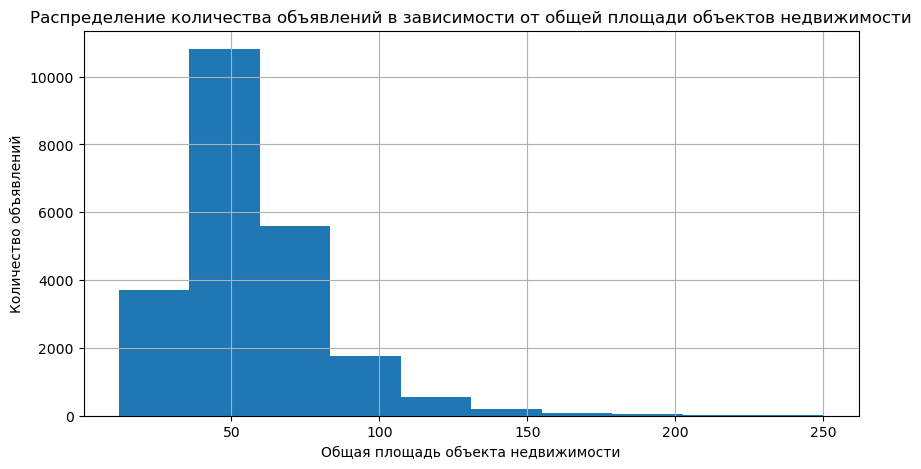

In [22]:
data['total_area'].hist(figsize=(10, 5))
plt.xlabel('Общая площадь объекта недвижимости')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от общей площади объектов недвижимости')
plt.show()

Площадь большинства представленных на рынке квартир варьируется между 40 и 80 кв.м.

#### Столбец `'first_day_exposition'`
Преобразуем данные в столбце в формат datetime, оставив только дату.

In [23]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d')

Построим гистограмму по этому столбцу.

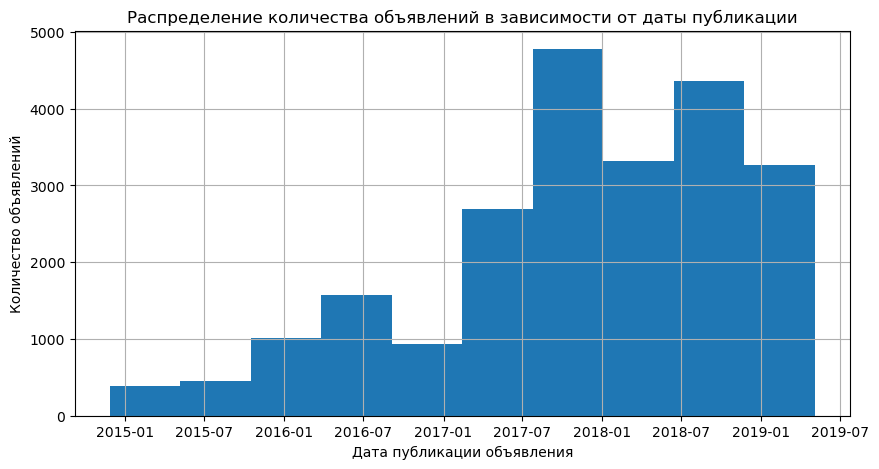

In [24]:
data['first_day_exposition'].hist(bins=10, figsize=(10, 5))
plt.xlabel('Дата публикации объявления')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от даты публикации')
plt.show()

Мы видим два пика продаж, приходящихся на вторую половину 2017 года и вторую половину 2018 года. Для того, чтобы установить зависимость между датой публикации объявления и стоимостью квартиры нам необходимо выделить отдельные компоненты даты (год, месяц, день недели). Этим мы займемся чуть позже. 

#### Столбец `'rooms'`

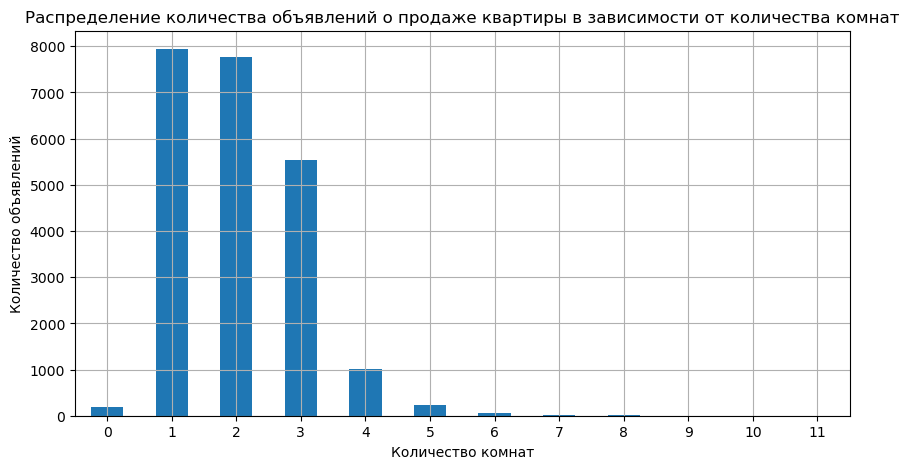

In [25]:
data.groupby('rooms').agg(count=('rooms', 'count')).plot.bar(legend=None, grid=True, figsize=(10,5))
plt.xlabel('Количество комнат')
plt.xticks(rotation=0)
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений о продаже квартиры в зависимости от количества комнат')
plt.show()

In [26]:
data['rooms'].describe()

count    22760.000000
mean         2.012742
std          0.985690
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

Мы видим, что для части квартир количество комнат указано 0. Вероятнее всего предположить ошибку при заполнении данных. Однако у нас есть столбец `'studio'`, в котором нет пропусков. Возможно, пользователи не заполняют количество комнат, если квартира представляет собой студию. Проверим это предположение.

In [27]:
# выведем количество студий в изначальном датафрейме

data['studio'].value_counts()

False    22612
True       148
Name: studio, dtype: int64

In [28]:
# выведем количество студий среди квартир с 0 комнат

len(data.loc[(data['studio'] == True) & (data['rooms'] == 0)] )

137

Мы видим, что всего в датафрейме представлено 148 студий, при этом у 137 студий количество комнат указано 0. Таким образом, если мы посчитаем такие данные ошибочными и удалим их, мы уничтожим практически всю информацию о студиях. В датафрейме их содержится немного, и вряд ли мы сможем сделать однозначные выводы о том, насколько такой тип планировки влияет на стоимость квартиры, но сохранить данные хотелось бы. Поступим следующим образом: для всех студий с количеством комнат 0 мы заменим это количество на 1, а квартиры с 0 комнат, которые студиями не являются, мы удалим, предварительно оценив процент потерь.

In [29]:
data.loc[(data['studio'] == True) & (data['rooms'] == 0), 'rooms'] = 1

In [30]:
(len(data.query('rooms == 0')) / len(data)) * 100

0.2548330404217926

Потери составят 0,25%.

In [31]:
data = data.query('rooms >= 1')

Теперь удалим квартиры с аномально большим количеством комнат. Изучив график, примем верхнюю границу в 6 комнат. Предварительно оценим  процент потерь.

In [32]:
(len(data.query('rooms > 6')) / len(data)) * 100

0.12333715091181394

Потери составят 0,12%.

In [33]:
data = data.query('rooms <= 6')

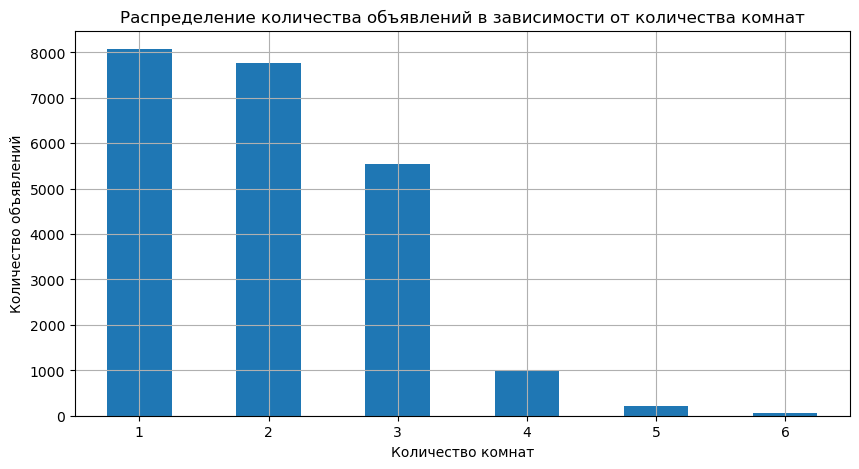

In [34]:
data.groupby('rooms').agg(count=('rooms', 'count')).plot.bar(legend=None, grid=True, figsize=(10,5))
plt.xlabel('Количество комнат')
plt.xticks(rotation=0)
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от количества комнат')
plt.show()

Наиболее часто продают 1- и 2-комнатные квартиры.

#### Столбец `'ceiling_height'`
В данном столбце есть пропущенные значения и выбросы данных. Заполним пропуски медианным значением высоты потолка (как величиной, устойчивой к выбросам).

In [35]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Для обработки аномальных значений посмотрим статистику столбца и гистограмму.

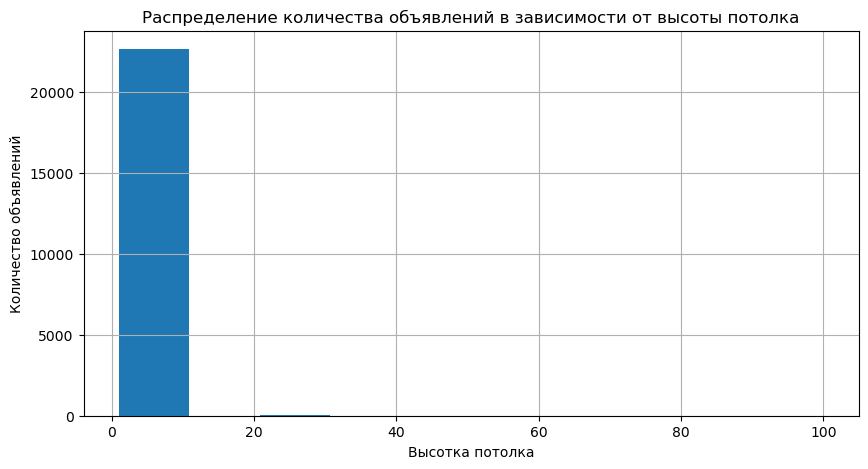

In [36]:
data['ceiling_height'].hist(figsize=(10,5))
plt.xlabel('Высотка потолка')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от высоты потолка')
plt.show()

In [37]:
data['ceiling_height'].describe()

count    22674.000000
mean         2.714288
std          0.992475
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Минимальное значение высоты потолков в датафрейме 1 метр, максимальное - 100 метров, что явно не соответствует действительности. СНиП регламентируют минимальную высоту потолка 2,5 метра, однако в реальности в старых квартирах они могут быть высотой 2,4 метра. Удалим строки с высотой потолка ниже этой величины. Предварительно оценим потери.

In [38]:
(len(data.query('ceiling_height < 2.4')) / len(data)) * 100

0.09261709446943636

Потери составят 0,09%.

In [39]:
data = data.loc[(data['ceiling_height'] >= 2.4)]

Максимальную высоту потолков СНиП не регламентирует. Примем за максимум высоту 4 метра и посмотрим на строки датафрейма, у которых это значение выше.

In [40]:
data[data['ceiling_height'] > 4]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,8200000.0,80.0,2018-11-06,3,4.15,3.0,44.2,2,NaN,False,False,12.2,NaN,Санкт-Петербург,20562.0,3167.0,2.0,344.0,1.0,838.0,38.0
355,17,3600000.0,55.2,2018-07-12,2,25.00,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
1129,20,6695000.0,36.9,2018-09-28,1,4.06,5.0,22.0,2,NaN,False,False,7.2,NaN,Санкт-Петербург,21725.0,2990.0,1.0,596.0,1.0,866.0,110.0
2639,17,4850000.0,59.7,2017-11-18,3,4.19,5.0,46.3,4,NaN,False,False,6.4,1.0,Санкт-Петербург,42964.0,15468.0,0.0,NaN,0.0,NaN,60.0
2802,7,14950000.0,50.0,2016-03-06,2,4.80,3.0,30.0,2,NaN,False,False,10.0,0.0,Санкт-Петербург,24433.0,1725.0,1.0,589.0,3.0,161.0,160.0
2823,8,2700000.0,39.0,2018-02-01,1,4.50,6.0,18.3,6,NaN,False,False,8.4,NaN,посёлок городского типа Токсово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2843,15,11990000.0,104.0,2018-03-13,3,4.20,3.0,66.0,2,NaN,False,False,15.0,NaN,Санкт-Петербург,22393.0,3884.0,0.0,NaN,0.0,NaN,350.0
2999,11,4450000.0,36.0,2017-12-12,1,4.19,5.0,18.0,1,NaN,False,False,8.0,NaN,Санкт-Петербург,24689.0,4256.0,1.0,1077.0,3.0,690.0,78.0
3067,13,6600000.0,95.0,2018-09-08,2,4.50,7.0,45.0,7,True,False,False,25.0,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.0
3148,14,2900000.0,75.0,2018-11-12,3,32.00,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
len(data[data['ceiling_height'] > 4])

57

Всего таких строк 57, причем в большинстве из них высота колеблется в пределах от 24 до 32 метров. Можно предположить, что это ошибка ввода данных, и на самом деле имеется в виду высота в 10 раз меньше (2.7 метров вместо 27). Разделим значения от 24 (включительно) в ячейках на 10, а затем удалим оставшиеся аномальные данные выше установленной нами максимальной величины.

In [42]:
data.loc[data['ceiling_height'] >= 24, 'ceiling_height'] = data['ceiling_height'] / 10

Оценим потери данных.

In [43]:
(len(data.query('ceiling_height > 4')) / len(data)) * 100

0.1677482011212643

Потери составят 0,17% данных.

In [44]:
data = data.loc[(data['ceiling_height'] <= 4)]

Убедимся в том, что аномальные значения удалены.

In [45]:
len(data.loc[(data['ceiling_height'] < 2.4) & (data['ceiling_height'] > 5)])

0

Посмотрим еще раз на гистограмму.

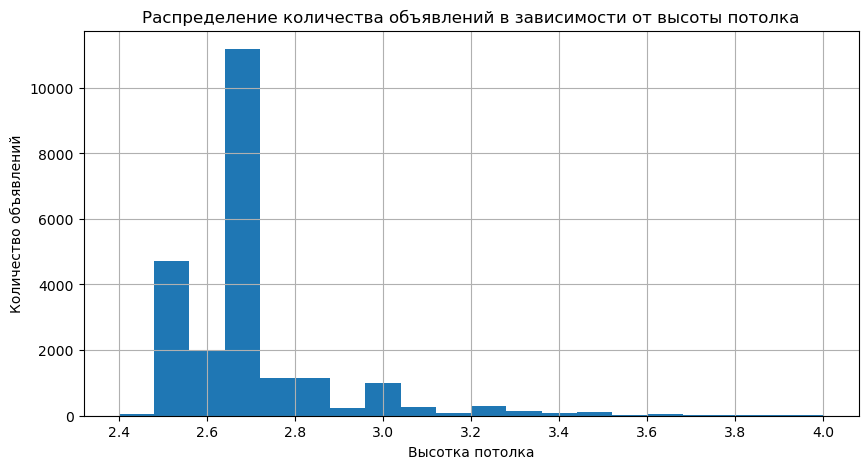

In [46]:
data['ceiling_height'].hist(bins=20, figsize=(10,5))
plt.xlabel('Высотка потолка')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от высоты потолка')
plt.show()

Чаще всего продаются квартиры со стандартной высотой потолка 2,5-2,7 м.

#### Столбец `'floors_total'`

В столбце `'floors_total'` пропущено 86 значений. Логическую замену для этого столбца предложить невозможно, поэтому удалим такие строки. Предварительно оценим потери данных.

In [47]:
(86 / len(data)) * 100

0.3802785761662613

Потери составят 0,38%.

In [48]:
data = data.dropna(subset=['floors_total'])

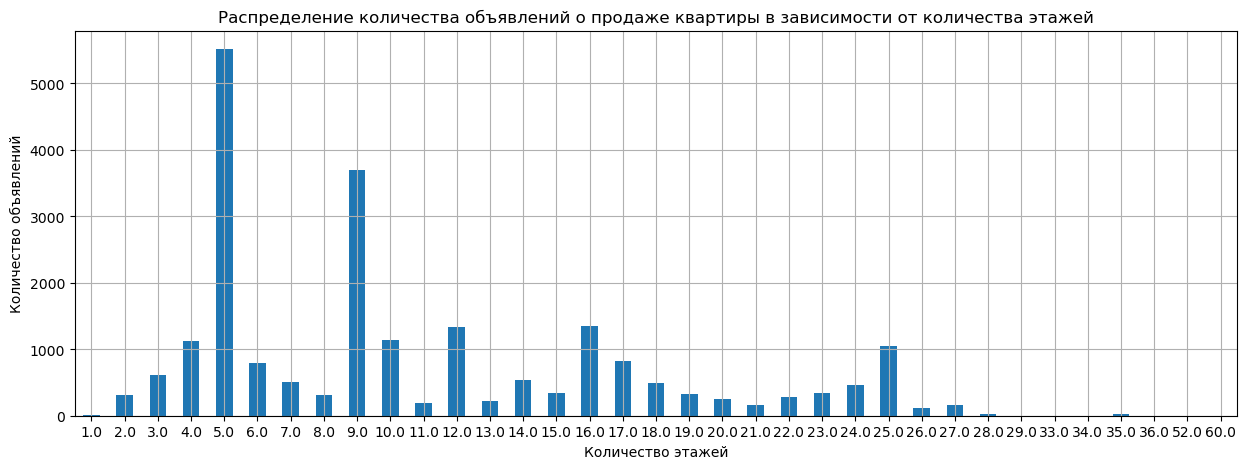

In [49]:
data.groupby('floors_total').agg(count=('floors_total', 'count')).plot.bar(legend=None, grid=True, figsize=(15,5))
plt.xlabel('Количество этажей')
plt.xticks(rotation=0)
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений о продаже квартиры в зависимости от количества этажей')
plt.show()

In [50]:
data['floors_total'].describe()

count    22531.000000
mean        10.801740
std          6.618537
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

С минимальным значением все хорошо, а к максимальному есть вопросы. Дело в том, что в [самом высоком жилом доме в Ленинградской области 29 этажей](https://lenobldoma.ru/doma-po-etazham), а в самом высоком жилом комплексе в Санкт-Петербурге, [жилом комплексе "Князь Александр Невский, 37 этажей](https://ru.wikipedia.org/wiki/%D0%9A%D0%BD%D1%8F%D0%B7%D1%8C_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80_%D0%9D%D0%B5%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_(%D0%B6%D0%B8%D0%BB%D0%BE%D0%B9_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BB%D0%B5%D0%BA%D1%81). Уберем все строки с количеством этажей больше 37, предварительно оценив потери.

In [51]:
(len(data.query('floors_total > 37')) / len(data)) * 100

0.008876658825618038

Потери составят менее 0,01% данных.

In [52]:
data = data.loc[(data['floors_total'] <= 37)]

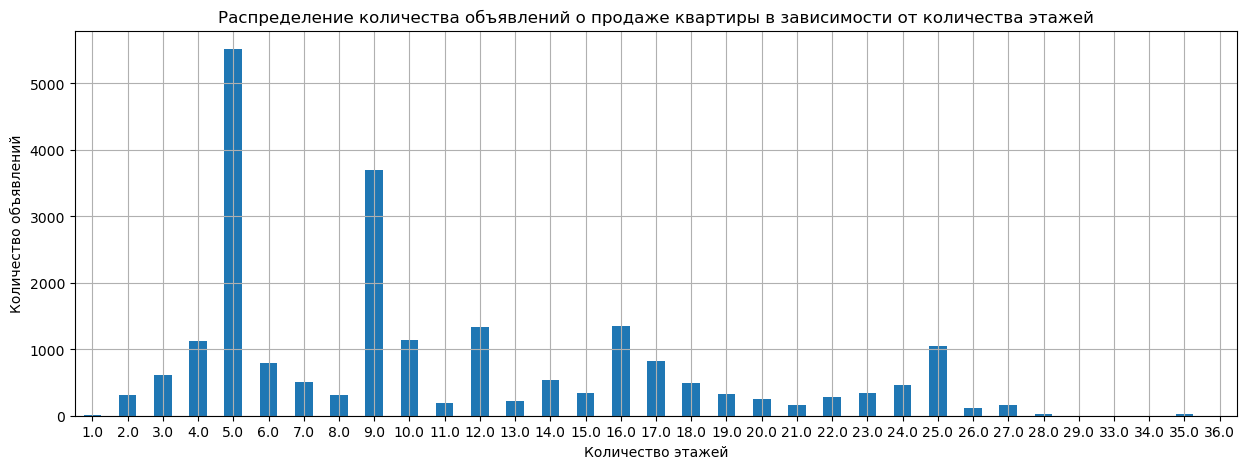

In [53]:
data.groupby('floors_total').agg(count=('floors_total', 'count')).plot.bar(legend=None, grid=True, figsize=(15,5))
plt.xlabel('Количество этажей')
plt.xticks(rotation=0)
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений о продаже квартиры в зависимости от количества этажей')
plt.show()

Чаще всего продают квартиры в домах высотой 4, 5, 9, 10, 12, 16 и 25 этажей.

#### Столбец `'living_area'`
Отношение жилой площади к общей является величиной более или менее постоянноq и регулируется строительными нормами. Определим медианное значение этого отношения по всему датафрейму и заполним пропущенные значения произведением общей площади квартиры и данного коэффициента.

In [54]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * (data['living_area'] / data['total_area']).median())

Изучим данные в столбце.

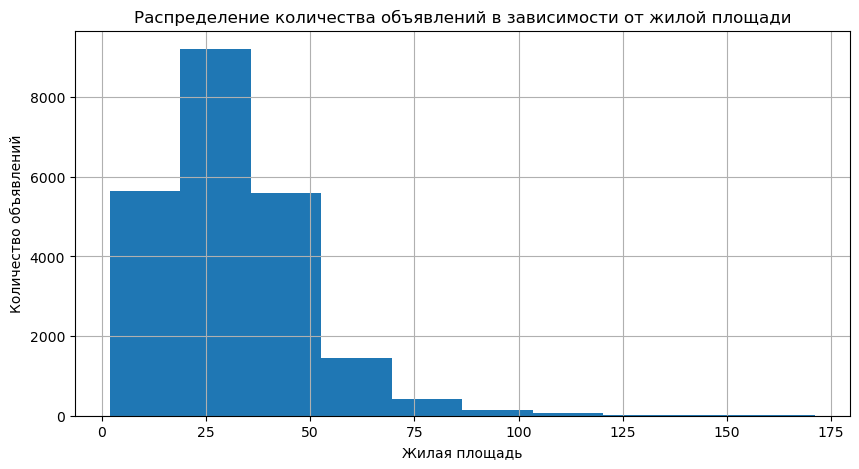

In [55]:
data['living_area'].hist(figsize=(10,5))
plt.xlabel('Жилая площадь')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от жилой площади')
plt.show()

In [56]:
data['living_area'].describe()

count    22529.000000
mean        32.477334
std         16.059967
min          2.000000
25%         18.900000
50%         30.000000
75%         41.000000
max        171.000000
Name: living_area, dtype: float64

Квартир с жилой площадью больше 120 кв.м. единицы. Оценим потери данных и удалим такие значения.

In [57]:
(len(data.query('living_area > 120')) / len(data)) * 100

0.17311021350259664

Потери составят 0,17% данных.

In [58]:
data = data.loc[(data['living_area'] <= 120)]

Если квартиры с большой жилой площадью могут быть, то представить себе квартиру с жилой площадью 2 кв.м. затруднительно. Ранее бы ранее мы допустили наличие на рынке квартир с общей площадью 12 кв.м. Применим медианный коэффициент к этой площади:

In [59]:
12 * (data['living_area'] / data['total_area']).median()

6.80675117504629

Примем минимум за 6.8 и удалим строки с меньшей жилой площадью.

In [60]:
data = data.loc[(data['living_area'] >= 6.8)]

Наконец округлим значения в столбце до двух знаков после десятичной точки.

In [61]:
data['living_area'] = data['living_area'].round(2)

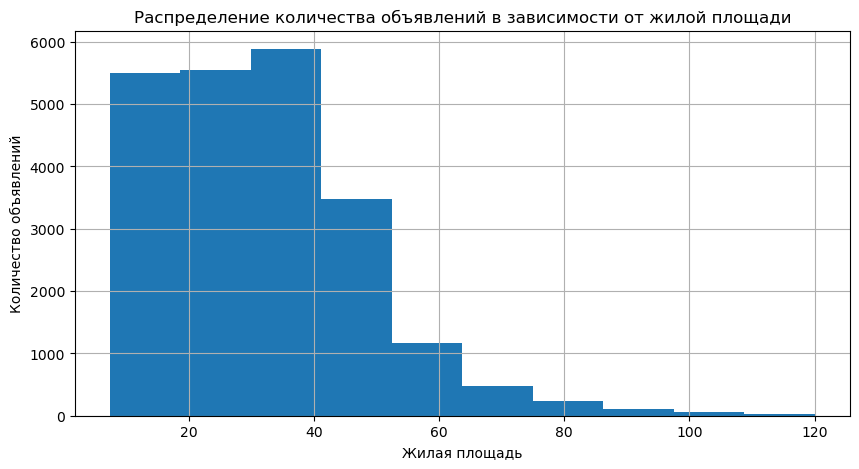

In [62]:
data['living_area'].hist(figsize=(10,5))
plt.xlabel('Жилая площадь')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от жилой площади')
plt.show()

Жилая площадь большинства квартир на рынке находится в диапазоне до 40 кв.м.

#### Столбец `'floor'`
Пропусков с столбце нет. Посмотрим на распределение данных.

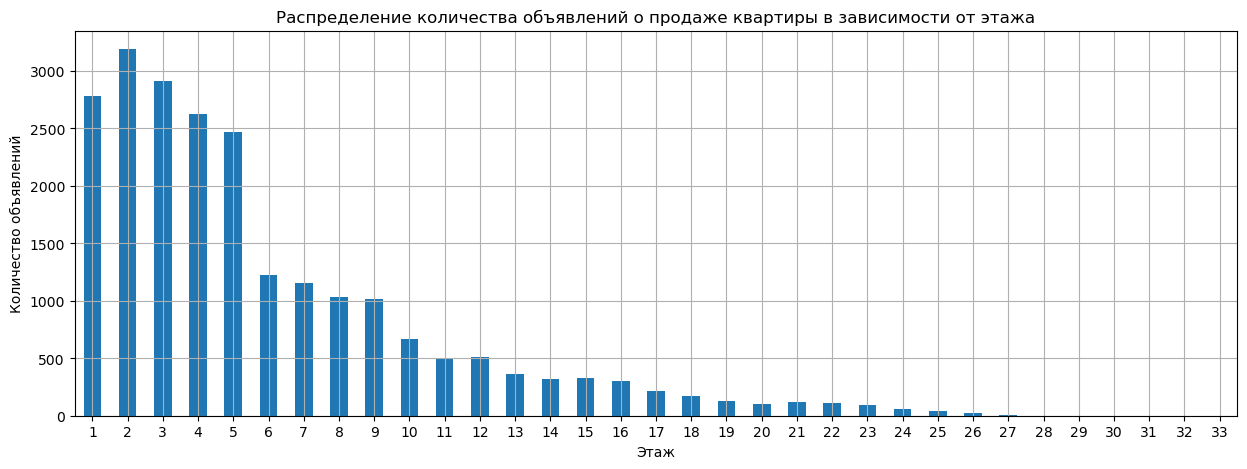

In [63]:
data.groupby('floor').agg(count=('floor', 'count')).plot.bar(legend=None, grid=True, figsize=(15,5))
plt.xlabel('Этаж')
plt.xticks(rotation=0)
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений о продаже квартиры в зависимости от этажа')
plt.show()

In [64]:
data['floor'].describe()

count    22483.000000
mean         5.909087
std          4.893484
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Аномальных значений нет, максимальное значение не превышает верхнее значение общего количества этажей.

Самый популярные этажи - 1-5.

#### Столбец `'is_apartment'`
В столбце содержатся данные булева типа, причем данных пропущено очень много. По аналогии по столбцом `'studio'` можем предположить, что в случае, если квартира является апартаментами, пользователь указывает это явным образом. Заменим пропущенные значения на False.

In [65]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Изучим данные в столбце.

In [66]:
data['is_apartment'].value_counts()

False    22443
True        40
Name: is_apartment, dtype: int64

Данные показывают, что подавляющее количество квартир не являются апартаментами.

#### Столбец `'studio'`
Пропусков в столбце нет, обработка не требуется. Изучим данные.

In [67]:
data['studio'].value_counts()

False    22341
True       142
Name: studio, dtype: int64

Данные показывают, что подавляющее количество квартир не являются студией.

#### Столбец `'open_plan'`
Пропусков в столбце нет, обработка не требуется. Изучим данные.

In [68]:
data['open_plan'].value_counts()

False    22476
True         7
Name: open_plan, dtype: int64

Квартир с открытой планировкой на рынке представлено крайне мало.

#### Столбец `'kitchen_area'`
Пропуски в данном столбце заполним по аналогии со столбцом `'living_area'`

In [69]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * (data['kitchen_area'] / data['total_area']).median())

Изучим данные.

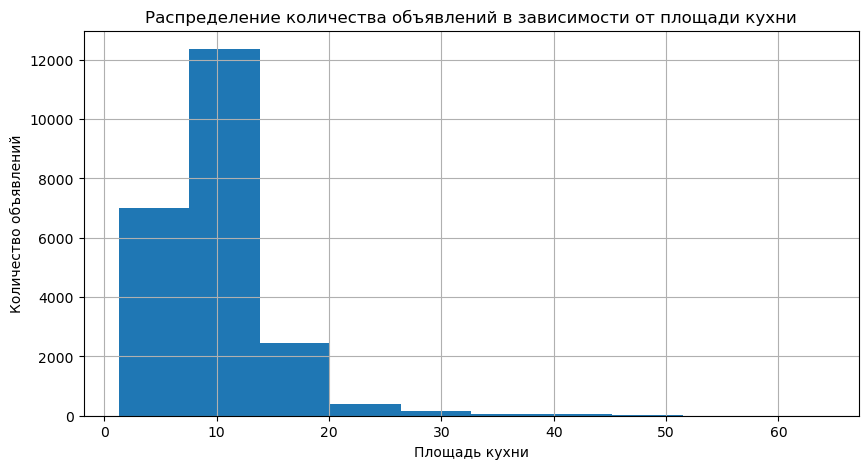

In [70]:
data['kitchen_area'].hist(figsize=(10,5))
plt.xlabel('Площадь кухни')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от площади кухни')
plt.show()

In [71]:
data['kitchen_area'].describe()

count    22483.000000
mean        10.005287
std          4.617144
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         64.000000
Name: kitchen_area, dtype: float64

Квартир с площадью больше 40 кв.м. в датафрейме очень мало. Оценим потерю данных и удалим строки с редкими значениями.

In [72]:
(len(data.query('kitchen_area > 40')) / len(data)) * 100

0.20904683538673663

Потери составят 0,21% данных.

In [73]:
data = data.loc[(data['kitchen_area'] <= 40)]

Согласно СНиП, минимальная площадь кухни в квартире должна быть не меньше 5 кв.м. Оценим потерю данных и удалим строки с меньшим значением.

In [74]:
(len(data.query('kitchen_area < 5')) / len(data)) * 100

1.6625066856837227

Потери составят 1,66% данных.

In [75]:
data = data.loc[(data['kitchen_area'] >= 5)]

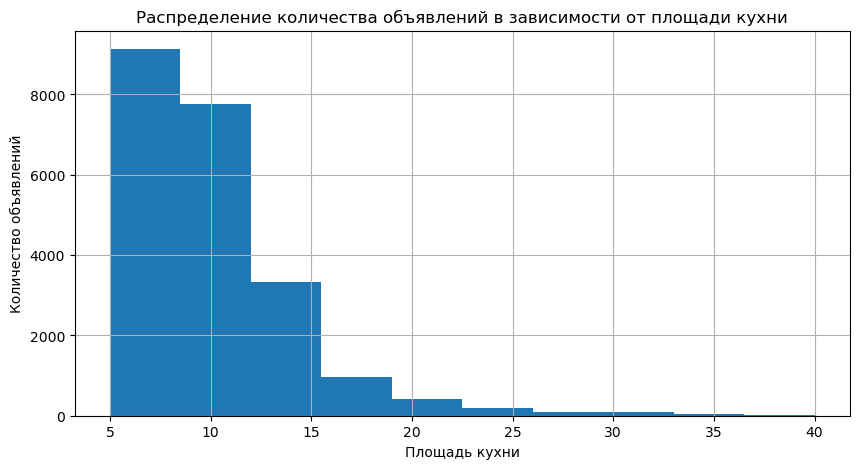

In [76]:
data['kitchen_area'].hist(figsize=(10,5))
plt.xlabel('Площадь кухни')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от площади кухни')
plt.show()

В большинстве квартир на рынке площадь кухни составляет 5-12 кв.м.

#### Столбец `'balcony'`
Столбец содержит пропуски. Если пользователь не указал количество балконов, вероятнее всего, их в квартире нет. Заменим пропуски в этом столбце на 0.

In [77]:
data['balcony'] = data['balcony'].fillna(0)

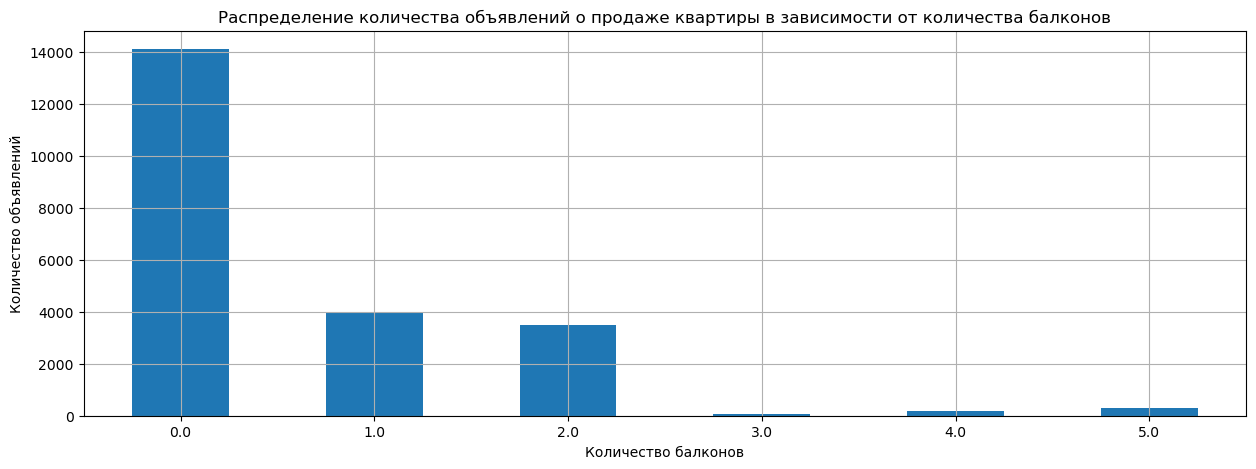

In [78]:
data.groupby('balcony').agg(count=('balcony', 'count')).plot.bar(legend=None, grid=True, figsize=(15,5))
plt.xlabel('Количество балконов')
plt.xticks(rotation=0)
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений о продаже квартиры в зависимости от количества балконов')
plt.show()

В большинстве представленных на рынке квартир балконы отсутствуют.

#### Столбец `'locality_name'`
В столбце содержатся пропуски. Предложить логичную замену в данном случае невозможно, поэтому оценим потери данных и удалим такие строки.

In [79]:
(data['locality_name'].isna().sum() / len(data)) * 100

0.2084938584961247

Потери составят 0,21% данных.

In [80]:
data = data.dropna(subset=['locality_name'])

Посмотрим на уникальные значения в этом столбце.

In [81]:
print(data['locality_name'].unique())
print(len(data['locality_name'].unique()))

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'посёлок Плодовое' 'деревня Заклинье'
 'поселок Торковичи' 'поселок Первомайское' 'Красное Село'
 'посёлок Понтонный' 'Сясьстрой' 'деревня Старая' 'деревня Лесколово'
 'село Путилово' 'Мурино' 'Ивангород' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Свет' 'деревня Оржицы'
 'деревня Кальтино' 'Кудрово' 'поселок Романовка

В столбце содержатся 329 уникальных значений. Однако, 'посёлок Пансионат Зелёный Бор' и 'поселок Пансионат Зелёный Бор' - это явно один и тот же населенный пункт. Заменим значения в столбце наименованиями населенных пунктов без указания типа населенного пункта.

In [82]:
def short_names(i):
    return re.findall('[А-Я][0-9А-Яа-яЁё\s\D]+', i)[0]

data['locality_name'] = data['locality_name'].apply(short_names)

len(data['locality_name'].unique())

271

Уникальных наименований стало меньше. Проверим теперь, не появились ли после замены наименований явные дубликаты.

In [83]:
data.duplicated().sum()

0

Посмотрим, где чаще всего продают квартиры.

In [84]:
data['locality_name'].value_counts().head(30)

Санкт-Петербург    14598
Мурино               520
Шушары               429
Кудрово              427
Всеволожск           388
Пушкин               353
Колпино              336
Парголово            321
Гатчина              301
Выборг               226
Петергоф             199
Сестрорецк           180
Красное Село         171
Сертолово            140
Новое Девяткино      140
Ломоносов            130
Кириши               120
Волхов               107
Бугры                104
Кингисепп            103
Тосно                102
Кронштадт             92
Коммунар              88
Сосновый Бор          84
Кировск               81
Никольское            80
Отрадное              77
Янино-1               67
Приозерск             66
Металлострой          65
Name: locality_name, dtype: int64

Больше всего квартир продается в Санкт-Петербурге и его крупнейших пригородах.

#### Столбец `'airports_nearest'`
Данный столбец содержит пропуски, которые мы заполним медианным расстоянием до ближайшего аэропорта по каждому населенному пункту.

In [85]:
for loc in data['locality_name'].unique():
    try:
        data.loc[(data['locality_name'] == loc) & (data['airports_nearest'].isna()), 'airports_nearest'] = list(data.loc[(data['locality_name'] == loc), 'airports_nearest']).median()
    except:
        continue
        

In [86]:
# проверяем количество оставшихся в столбце пропусков
data['airports_nearest'].isna().sum()

5069

Осталось 5069 пропусков. Очевидно, что для многих населенных пунктов изначально не было указано расстояние до ближайшего аэропорта, например, по причине отсутствия аэропорта поблизости от населенного пункта либо отсутствия в системе картографических данных для конкретного поселения.

Выявление зависимости стоимости квартиры от расстояния до аэропорта не относится к задачам нашего исследования, поэтому оставим пропуски как есть (искать данные по каждому населенному пункту слишком расточительно по времени, а удаление всех строк с пропусками в этом столбце означало бы неоправданную потерю четверти данных). Рассмотрим дополнительно статистику и гистограмму по столбцу.

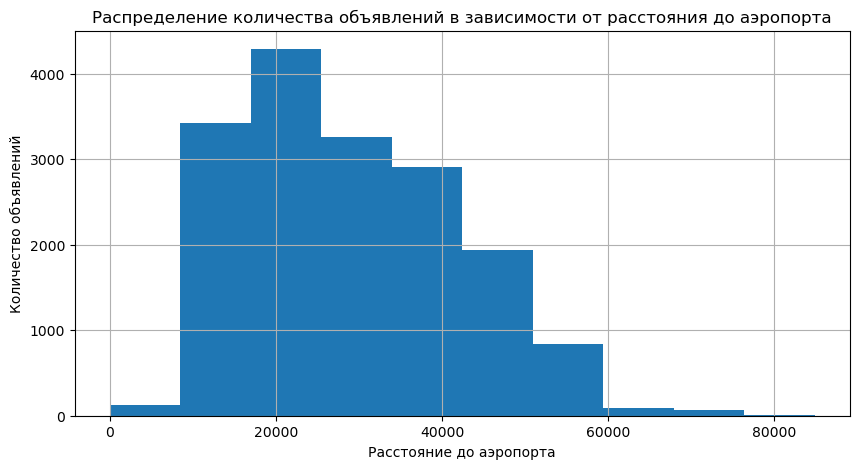

In [87]:
data['airports_nearest'].hist(figsize=(10,5))
plt.xlabel('Расстояние до аэропорта')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от расстояния до аэропорта')
plt.show()

In [88]:
data['airports_nearest'].describe()

count    16948.000000
mean     28908.834022
std      12806.644614
min          0.000000
25%      18398.000000
50%      26958.500000
75%      37436.250000
max      84869.000000
Name: airports_nearest, dtype: float64

У части данных указано расстояние до ближайшего аэропорта 0 км, что вряд ли верно. Посмотрим на эти данные.

In [89]:
data[data['airports_nearest'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,False,False,False,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Всего одна строка с такими данными. Заменим значение в ней на медианное значение по населенному пункту (Санкт-Петербург).

In [90]:
data.loc[21085, 'airports_nearest'] = data.loc[(data['locality_name'] == 'Санкт-Петербург', 'airports_nearest')].median()

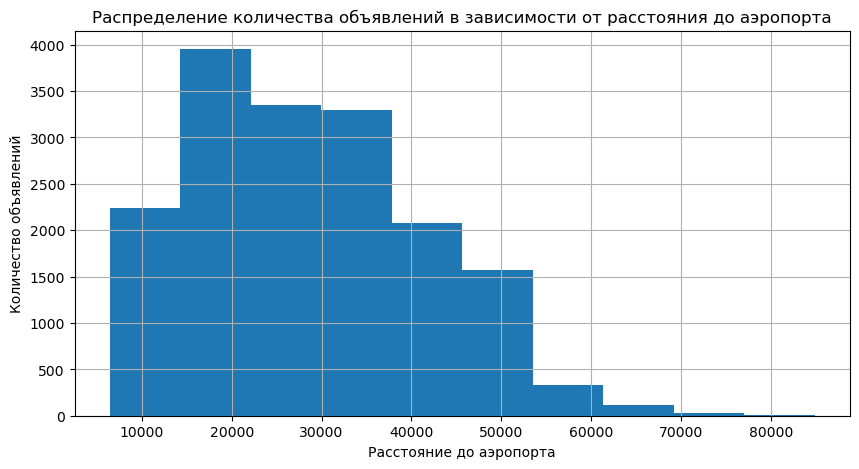

In [91]:
data['airports_nearest'].hist(figsize=(10,5))
plt.xlabel('Расстояние до аэропорта')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от расстояния до аэропорта')
plt.show()

Чаще всего продаваемые квартиры расположены на расстоянии от 15 до 40 км от ближайшего аэропорта.

#### Столбец `'cityCenters_nearest'`
Заполним пропуски в этом столбце по аналогии со столбцом `'airports_nearest'`.

In [92]:
for loc in data['locality_name'].unique():
    try:
        data.loc[(data['locality_name'] == loc) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = list(data.loc[(data['locality_name'] == loc), 'cityCenters_nearest']).median()
    except:
        continue

In [93]:
data['cityCenters_nearest'].isna().sum()

5052

Пропуски заполнить не удалось. Вероятнее всего, в системе также отсутствуют данные для отдельных населенных пунктов. Оставим пропуски как есть.

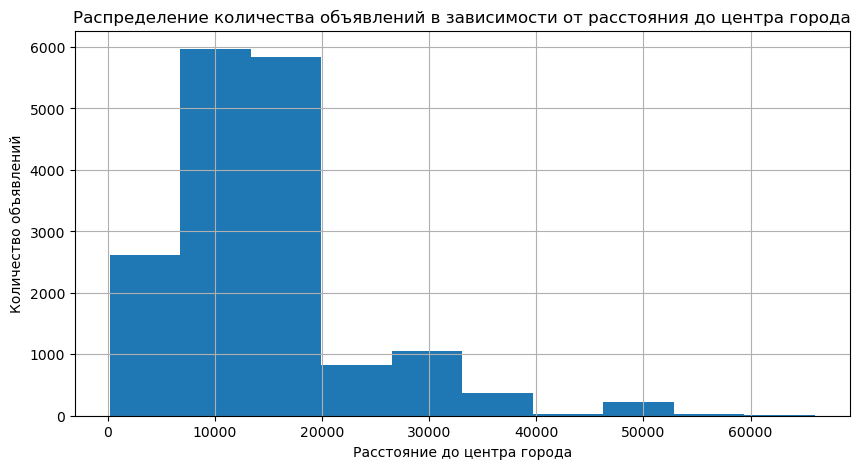

In [94]:
data['cityCenters_nearest'].hist(figsize=(10,5))
plt.xlabel('Расстояние до центра города')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от расстояния до центра города')
plt.show()

Чаще всего продаваемые квартиры расположены в пределах от 7 до 20 км от центра города.

#### Столбец `'parks_around3000'`
Заполним пропуски в этом столбце по аналогии со столбцом `'airports_nearest'`.

In [95]:
for loc in data['locality_name'].unique():
    try:
        data.loc[(data['locality_name'] == loc) & (data['parks_around3000'].isna()), 'parks_around3000'] = list(data.loc[(data['locality_name'] == loc), 'parks_around3000']).median()
    except:
        continue

In [96]:
data['parks_around3000'].isna().sum()

5051

Пропуски остались, вероятнее всего, по той же причине, что и раньше. Оставим пропуски в столбцах как есть.

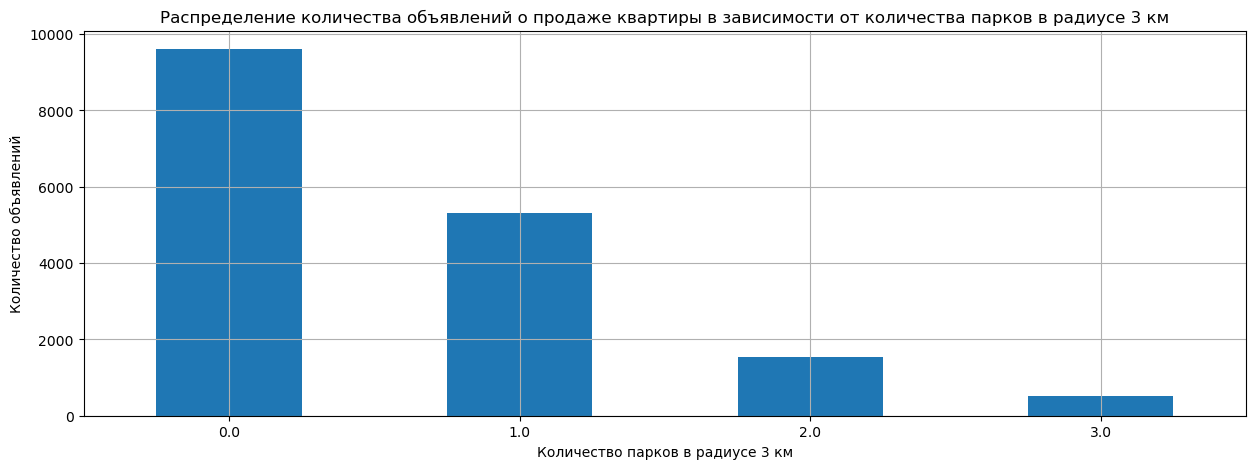

In [97]:
data.groupby('parks_around3000').agg(count=('parks_around3000', 'count')).plot.bar(legend=None, grid=True, figsize=(15,5))
plt.xlabel('Количество парков в радиусе 3 км')
plt.xticks(rotation=0)
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений о продаже квартиры в зависимости от количества парков в радиусе 3 км')
plt.show()

Чаще всего парки в радиусе трех километров от продаваемых квартир отсутствуют.

#### Столбец `'parks_nearest'`

Заполним пропуски в этом столбце по аналогии со столбцом `'airports_nearest'`.

In [98]:
for loc in data['locality_name'].unique():
    try:
        data.loc[(data['locality_name'] == loc) & (data['parks_nearest'].isna()), 'parks_nearest'] = list(data.loc[(data['locality_name'] == loc), 'parks_nearest']).median()
    except:
        continue

In [99]:
data['parks_nearest'].isna().sum()

14651

Оставшиеся пропуски оставляем без обработки.

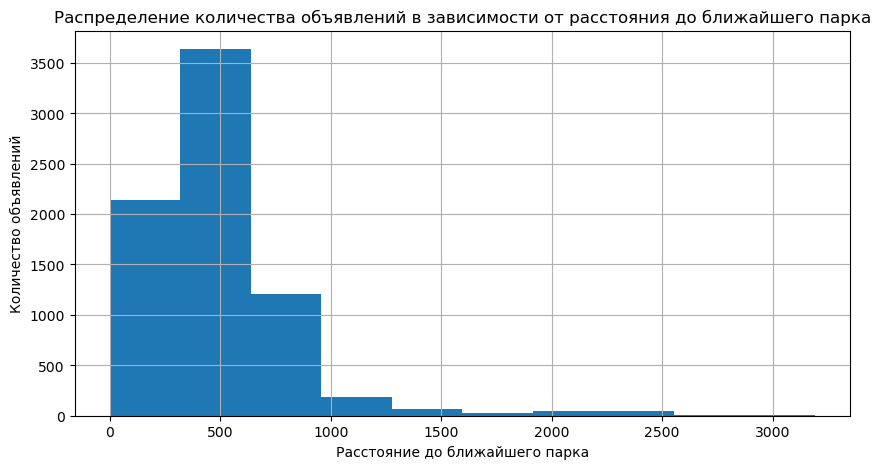

In [100]:
data['parks_nearest'].hist(figsize=(10,5))
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от расстояния до ближайшего парка')
plt.show()

Из тех квартир, для которых указано, что в радиусе 3 км от них есть парки, большинство расположены на расстоянии менее 1 км от ближайшего парка.

#### Столбец `'ponds_around3000'`
Заполним пропуски в этом столбце по аналогии со столбцом `'airports_nearest'`.

In [101]:
for loc in data['locality_name'].unique():
    try:
        data.loc[(data['locality_name'] == loc) & (data['ponds_around3000'].isna()), 'ponds_around3000'] = list(data.loc[(data['locality_name'] == loc), 'ponds_around3000']).median()
    except:
        continue

In [102]:
data['ponds_around3000'].isna().sum()

5051

Оставшиеся пропуски оставляем без обработки.

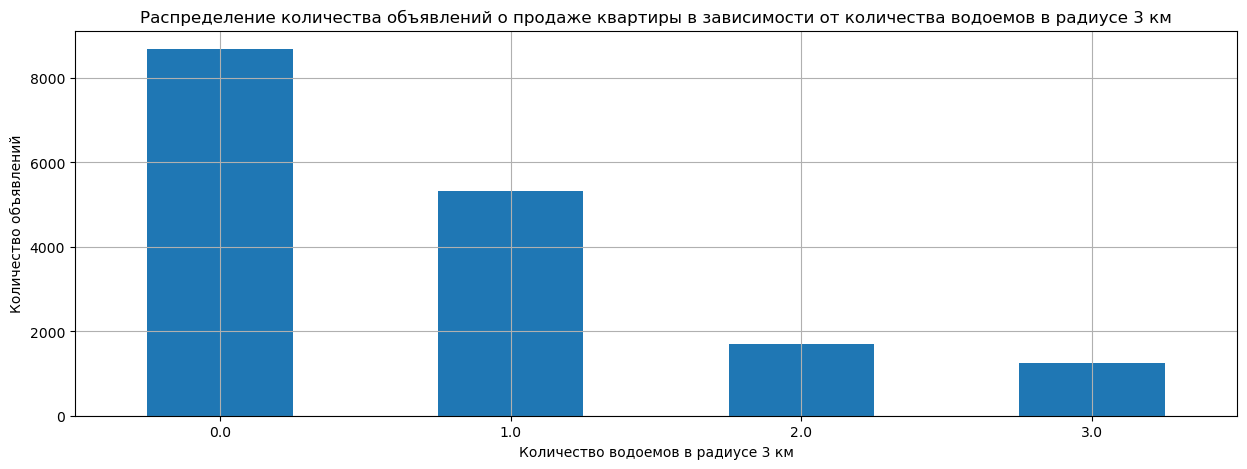

In [103]:
data.groupby('ponds_around3000').agg(count=('ponds_around3000', 'count')).plot.bar(legend=None, grid=True, figsize=(15,5))
plt.xlabel('Количество водоемов в радиусе 3 км')
plt.xticks(rotation=0)
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений о продаже квартиры в зависимости от количества водоемов в радиусе 3 км')
plt.show()

Чаще всего водоемы в радиусе трех километров от продаваемых квартир отсутствуют.

#### Столбец `'ponds_nearest'`
Заполним пропуски в этом столбце по аналогии со столбцом `'airports_nearest'`.

In [104]:
for loc in data['locality_name'].unique():
    try:
        data.loc[(data['locality_name'] == loc) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = list(data.loc[(data['locality_name'] == loc), 'ponds_nearest']).median()
    except:
        continue

In [105]:
data['ponds_nearest'].isna().sum()

13735

Оставшиеся пропуски оставляем без обработки.

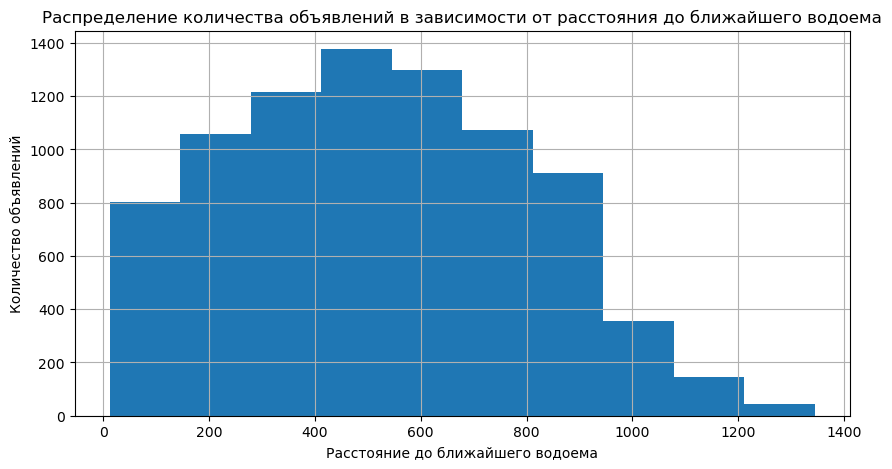

In [106]:
data['ponds_nearest'].hist(figsize=(10,5))
plt.xlabel('Расстояние до ближайшего водоема')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от расстояния до ближайшего водоема')
plt.show()

Из тех квартир, для которых указано, что в радиусе 3 км от них есть водоемы, чаще всего квартиры расположены на расстоянии от 300 до 800 метров от ближайшего водоема.

#### Столбец `'days_exposition'`
В данном столбце содержится большое количество пропусков. Вероятнее всего, на момент формирования датафрейма объявления еще не были сняты с публикации. Поскольку у нас нет модели, которая могла бы предсказать, как долго продаются квартиры того или иного типа, оставим эти данные незаполненными.

#### Изменение типов данных
Для удобства восприятия и подсчетов изменим типы данных в указанных ниже столбцах.

In [107]:
data['floors_total'] = data['floors_total'].astype('int')
data['floor'] = data['floor'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int')

#### Данные после предобработки

In [108]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,40.61,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
11,9,3300000.0,44.00,2018-08-27,2,2.65,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22017 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22017 non-null  int64         
 1   last_price            22017 non-null  float64       
 2   total_area            22017 non-null  float64       
 3   first_day_exposition  22017 non-null  datetime64[ns]
 4   rooms                 22017 non-null  int64         
 5   ceiling_height        22017 non-null  float64       
 6   floors_total          22017 non-null  int32         
 7   living_area           22017 non-null  float64       
 8   floor                 22017 non-null  int32         
 9   is_apartment          22017 non-null  bool          
 10  studio                22017 non-null  bool          
 11  open_plan             22017 non-null  bool          
 12  kitchen_area          22017 non-null  float64       
 13  balcony         

In [110]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5069
cityCenters_nearest      5052
parks_around3000         5051
parks_nearest           14651
ponds_around3000         5051
ponds_nearest           13735
days_exposition          2848
dtype: int64

In [111]:
((data.isna().sum() / len(data)) * 100).round(2)

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height           0.00
floors_total             0.00
living_area              0.00
floor                    0.00
is_apartment             0.00
studio                   0.00
open_plan                0.00
kitchen_area             0.00
balcony                  0.00
locality_name            0.00
airports_nearest        23.02
cityCenters_nearest     22.95
parks_around3000        22.94
parks_nearest           66.54
ponds_around3000        22.94
ponds_nearest           62.38
days_exposition         12.94
dtype: float64

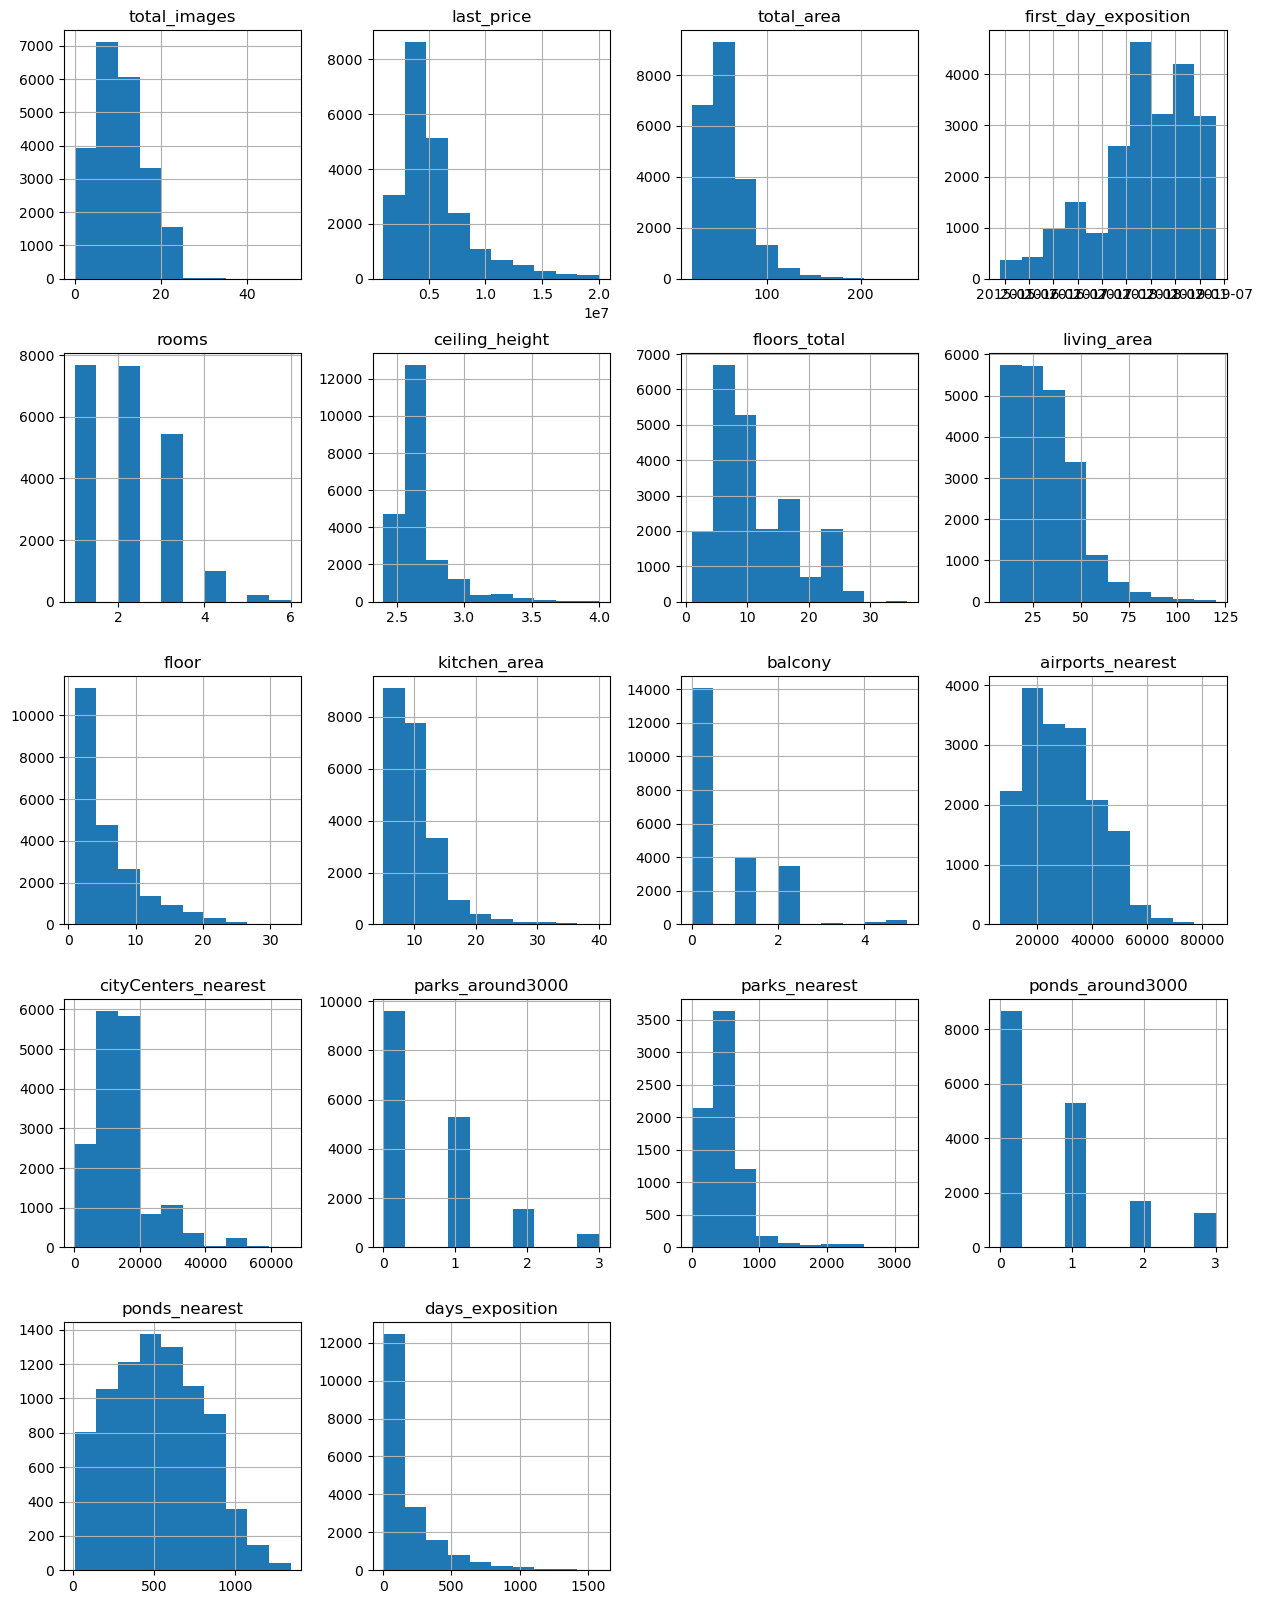

In [112]:
data.hist(figsize=(15, 20))
None

Из 23699 исходных строк после удаления строк с пустыми и аномальными значениями осталось 22017 (93%). Пропуски устранены не во всех столбцах, так как не для всех данных удалось подобрать замену.

### Посчитайте и добавьте в таблицу новые столбцы

In [113]:
# добавим в таблицу цену 1 кв.м. жилья
data['price_per_square'] = (data['last_price'] / data['total_area']).round(2)

# добавим в таблицу день публикации объявления
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

# добавим в таблицу месяц публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month

# добавим в таблицу год публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year

# добавим в таблицу тип этажа квартиры
f = lambda row: 'последний' if row['floor'] == row['floors_total'] else ('первый' if row['floor'] == 1 else 'другой')
data['floor_category'] = data.loc[:, ['floor', 'floors_total']].apply(f, axis=1)

# добавим в таблицу расстояние в км до центра города
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).astype('float32').round(0)

# добавим в таблицу стоимость в миллионах
data['last_price_mil'] = data['last_price'] / 1000000

Для выявления зависимости стоимости квартиры от различных параметров в таблицу добавлены следующие столбцы:
- цена одного квадратного метра жилья
- день публикации объявления
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры
- расстояние в км до центра города (для упрощения дальнейших расчетов значения приведены к типу float32) 

### Проведите исследовательский анализ данных

#### Задание: "Изучите, как быстро продавались квартиры (столбец days_exposition)"

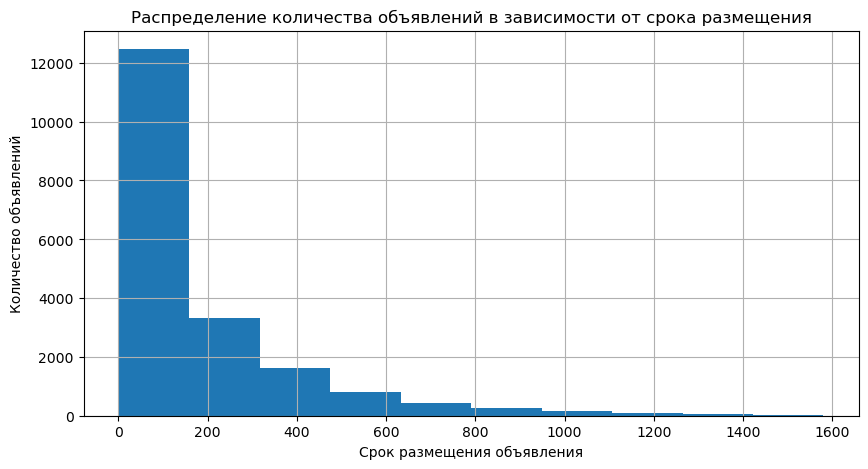

In [114]:
data['days_exposition'].hist(figsize=(10,5))
plt.xlabel('Срок размещения объявления')
plt.ylabel('Количество объявлений')
plt.title('Распределение количества объявлений в зависимости от срока размещения')
plt.show()

In [115]:
data['days_exposition'].describe()

count    19169.000000
mean       178.609161
std        216.889810
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медианный срок продажи квартиры составляет 94 дня, а средний - 178. Такая большая разница объясняется наличием некоторого количества очень долгих продаж (максимальный период превышает 4 года).

Данные показывают, что 75% квартир продается в течение 9 месяцев после публикации объявления. Необычно долгими можно считать продажи, которые занимают более одного года.

Самая быстрая из представленных продаж заняла всего 1 день.

#### Задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта?"
"Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количества комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год)

##### Выявление зависимости цены от общей площади

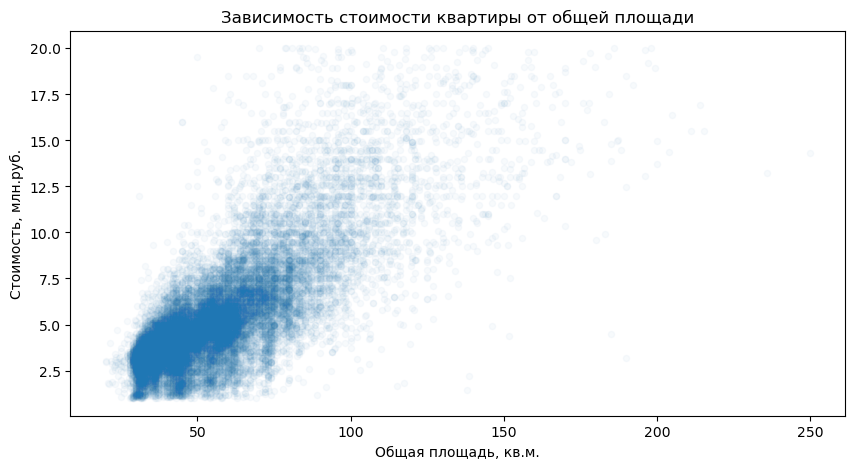

In [116]:
data.plot(x='total_area', y='last_price_mil', kind='scatter', alpha=0.03, figsize=(10,5))
plt.xlabel('Общая площадь, кв.м.')
plt.ylabel('Стоимость, млн.руб.')
plt.title('Зависимость стоимости квартиры от общей площади')
plt.show()

In [117]:
data['total_area'].corr(data['last_price_mil'])

0.7661482552307226

График и корреляция в 0,77 демонстируют наличие достаточно сильной прямой связи между полной стоимостью квартиры и общей площадью.

##### Выявление зависимости цены от жилой площади

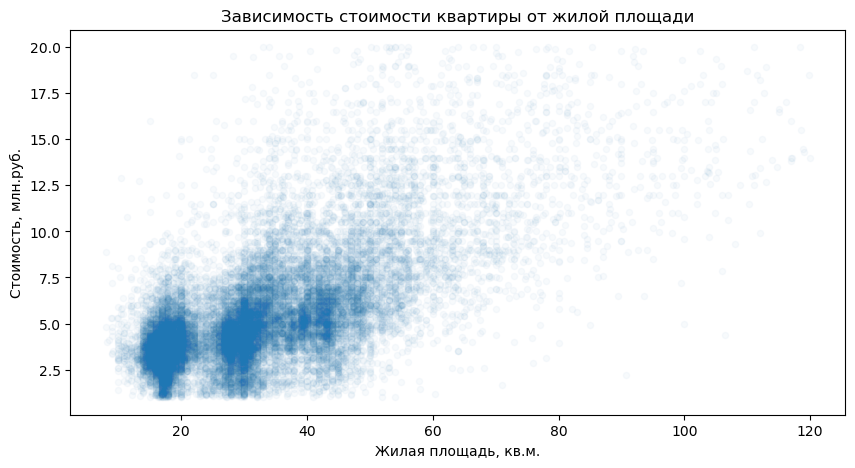

In [118]:
data.plot(x='living_area', y='last_price_mil', kind='scatter', alpha=0.03, figsize=(10,5))
plt.xlabel('Жилая площадь, кв.м.')
plt.ylabel('Стоимость, млн.руб.')
plt.title('Зависимость стоимости квартиры от жилой площади')
plt.show()

In [119]:
data['living_area'].corr(data['last_price_mil'])

0.6606348379264048

График и корреляция в 0,66 демонстируют наличие прямой связи между полной стоимостью квартиры и жилой площадью, которая, однако, является более слабой, чем зависимость от общей площади.

##### Выявление зависимости цены от площади кухни

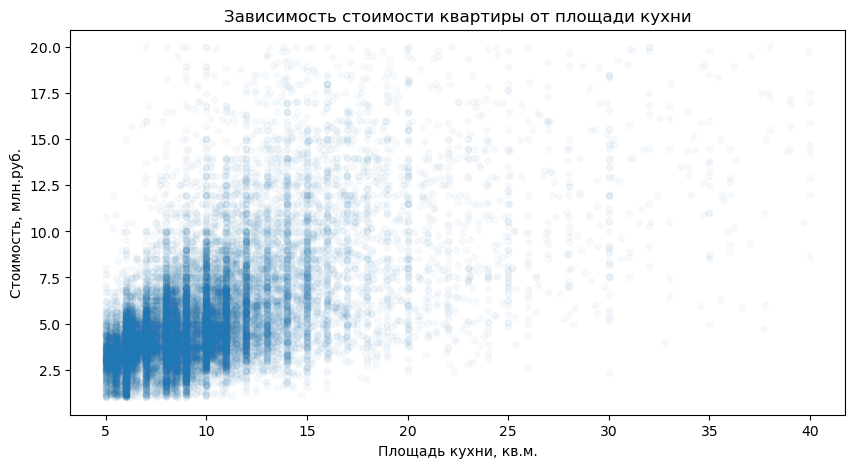

In [120]:
data.plot(x='kitchen_area', y='last_price_mil', kind='scatter', alpha=0.03, figsize=(10,5))
plt.xlabel('Площадь кухни, кв.м.')
plt.ylabel('Стоимость, млн.руб.')
plt.title('Зависимость стоимости квартиры от площади кухни')
plt.show()

In [121]:
data['kitchen_area'].corr(data['last_price_mil'])

0.5828446064238642

График и корреляция в 0,58 демонстируют наличие прямой связи между полной стоимостью квартиры и жилой площадью, которая, однако, является более слабой, чем зависимость от полной и жилой площади.

##### Выявление зависимости цены от количества комнат

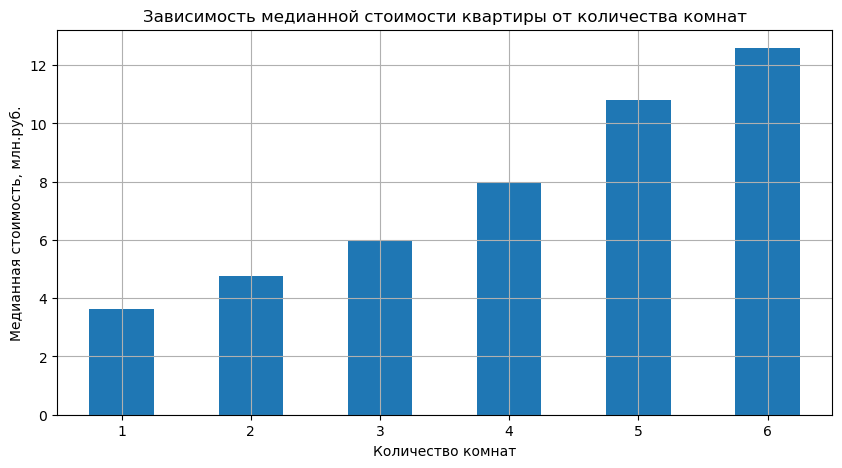

In [122]:
data.pivot_table(index='rooms', values='last_price_mil', aggfunc='median').plot(kind='bar', y='last_price_mil', grid=True, legend=False, figsize=(10,5))
plt.xlabel('Количество комнат')
plt.xticks(rotation=0)
plt.ylabel('Медианная стоимость, млн.руб.')
plt.title('Зависимость медианной стоимости квартиры от количества комнат')
plt.show()

In [123]:
data['rooms'].corr(data['last_price_mil'])

0.49026712648495424

График зависимости медианной полной стоимости квартиры от количества комнат и корреляция в 0,49 демонстируют наличие прямой связи между количеством комнат и полной стоимостью квартиры.

##### Выявление зависимости цены от типа этажа, на котором расположена квартира

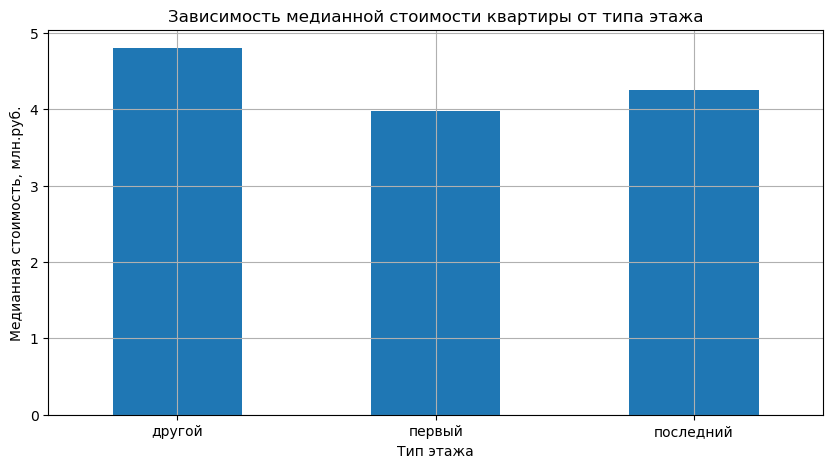

In [124]:
data.pivot_table(index='floor_category', values='last_price_mil', aggfunc='median').plot(kind='bar', y='last_price_mil', grid=True, legend=False, figsize=(10,5))
plt.xlabel('Тип этажа')
plt.xticks(rotation=0)
plt.ylabel('Медианная стоимость, млн.руб.')
plt.title('Зависимость медианной стоимости квартиры от типа этажа')
plt.show()

Так как коэффициент корреляции для категориального признака мы посчитать не можем, рассмотрим корреляцию между номером этажа и стоимостью квартиры.

In [125]:
data['floor'].corr(data['last_price_mil'])

0.09637435352831206

График показывает следующее распределение медианной цены в зависимости от типа этажа:
- самые дешевые квартиры расположены на первом этаже
- самые дорогие квартиры расположены на любых других этажах, кроме первого и последнего

Корреляция между номером этажа и стоимостью квартиры очень низкая, что означает отсутствие линейного зависимости (с увеличением высоты этажа стоимость не растет и не снижается линейно). Для покупателя большее значение имеет, расположена ли квартира на крайних этажах.

##### Выявление зависимости цены от даты размещения (день недели)

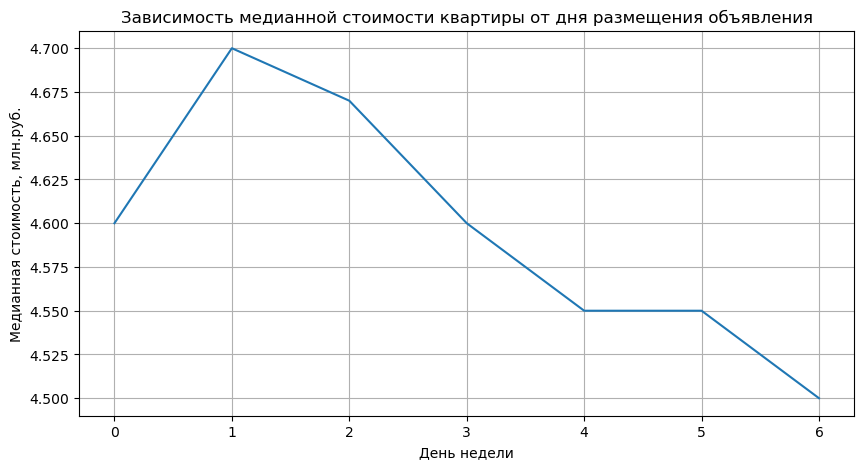

In [126]:
data.pivot_table(index='exposition_weekday', values='last_price_mil', aggfunc='median').plot(grid=True, legend=False, figsize=(10,5))
plt.xlabel('День недели')
plt.ylabel('Медианная стоимость, млн.руб.')
plt.title('Зависимость медианной стоимости квартиры от дня размещения объявления')
plt.show()

График показывает, что в объявлениях, размещаемых по вторникам, медианная стоимость квартир выше, чем в других объявлениях. Минимальная стоимость указывается в объявлениях, размещаемым по воскресеньям. 

Посмотрим также, в какие дни недели размещается больше объявлений.

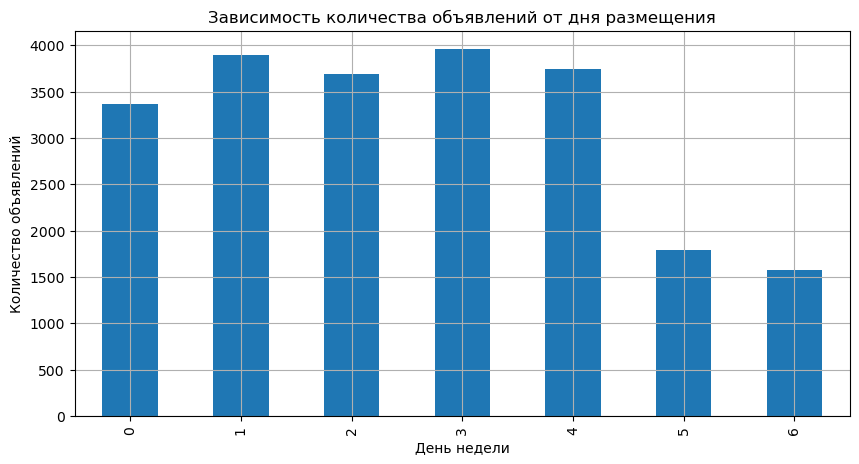

In [127]:
data.pivot_table(index='exposition_weekday', values='last_price_mil', aggfunc='count').plot(kind='bar', y='last_price_mil', grid=True, legend=False, figsize=(10,5))
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')
plt.title('Зависимость количества объявлений от дня размещения')
plt.show()

По выходным объявлений размещается заметно меньше, чем в будние дни.

##### Выявление зависимости цены от даты размещения (месяц)

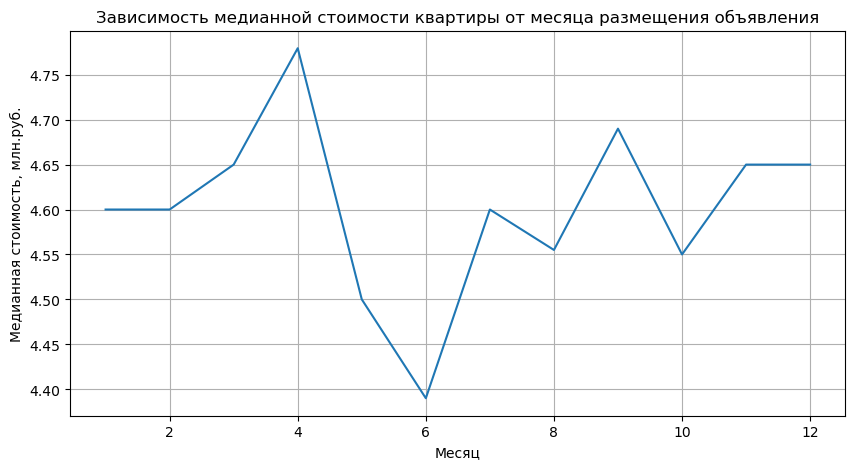

In [128]:
data.pivot_table(index='exposition_month', values='last_price_mil', aggfunc='median').plot(grid=True, legend=False, figsize=(10,5))
plt.xlabel('Месяц')
plt.ylabel('Медианная стоимость, млн.руб.')
plt.title('Зависимость медианной стоимости квартиры от месяца размещения объявления')
plt.show()

График зависимости стоимости квартиры от месяца размещения объявления позволяет выявить следующие закономерности:
- наиболее высокая стоимость квартир наблюдается в апреле и сентябре
- минимальная стоимость квартир наблюдается в июне
- стоимость квартир увеличивается в период с марта по апрель (включительно), в июле, сентябре и ноябре
- стоимость квартир резко снижается в период с мая по июнь (включительно), также наблюдается снижение стоимости в августе и октябре
- в начале года стоимость квартир немного снижается по сравнению с концом года, но в целом зимой цены практически не меняются

Итого: покупать квартиры лучше в мае-июне, а продавать - в марте-апреле.

Посмотрим также, в какие месяцы размещается больше объявлений.

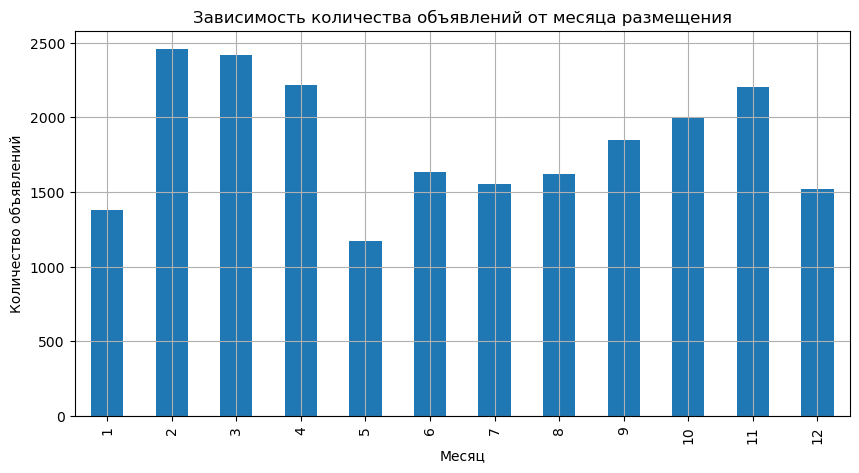

In [129]:
data.pivot_table(index='exposition_month', values='last_price_mil', aggfunc='count').plot(kind='bar', y='last_price_mil', grid=True, legend=False, figsize=(10,5))
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.title('Зависимость количества объявлений от месяца размещения')
plt.show()

Больше всего объявлений о продаже квартир размещается в феврале, марте, апреле и ноябре, а меньше всего - в мае.

##### Выявление зависимости цены от даты размещения (год)

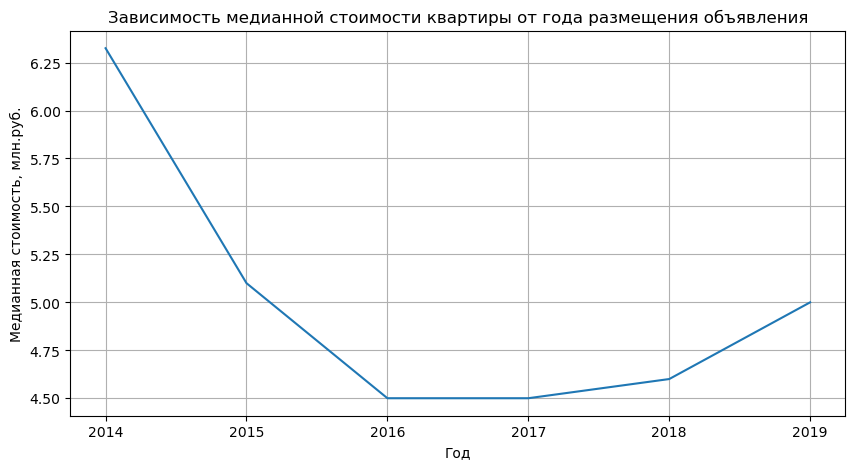

In [130]:
data.pivot_table(index='exposition_year', values='last_price_mil', aggfunc='median').plot(grid=True, legend=False, figsize=(10,5))
plt.xlabel('Год')
plt.ylabel('Медианная стоимость, млн.руб.')
plt.title('Зависимость медианной стоимости квартиры от года размещения объявления')
plt.show()

График зависимости стоимости квартиры от года размещения объявления позволяет выявить следующие закономерности:
- в период с 2014 по 2016 наблюдалось снижение стоимости продаваемых квартир
- в период с 2016 по 2017 год стоимость квартир не изменялась
- с 2018 года наблюдается постепенный рост стоимости продаваемых квартир, который к 2019 году достиг уровня 2015 года

Изучим, как менялась стомость одного квадратного метра жилья по годам.

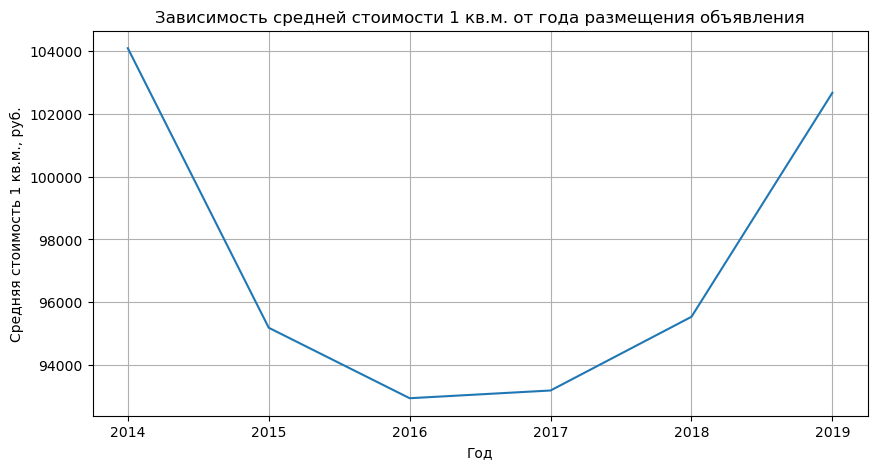

In [131]:
data.pivot_table(index='exposition_year', values='price_per_square', aggfunc='mean').plot(grid=True, legend=False, figsize=(10,5))
plt.xlabel('Год')
plt.ylabel('Средняя стоимость 1 кв.м., руб.')
plt.title('Зависимость средней стоимости 1 кв.м. от года размещения объявления')
plt.show()

График изменения средней стоимости одного квадратного метра жилья в общем повторяет график зависимости стоимости квартиры от года размещения объявления. Выявлены следующие закономерности:
- в период с 2014 по 2016 наблюдалось снижение стоимости одного кв.м. жилья
- с 2017 года наблюдается рост стоимости одного кв.м. жилья, который к 2019 году практически достиг уровня 2014 года

Посмотрим также на количество размещаемых объявлений по годам.

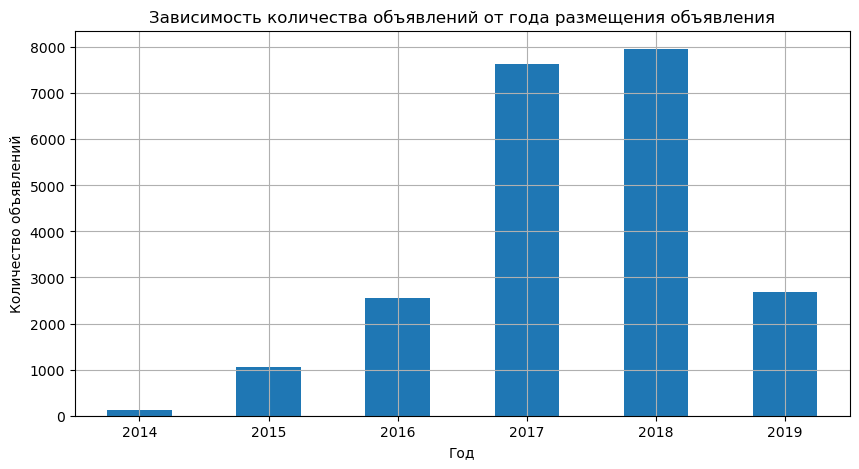

In [132]:
data.pivot_table(index='exposition_year', values='last_price_mil', aggfunc='count').plot(kind='bar', y='last_price_mil', grid=True, legend=False, figsize=(10,5))
plt.xlabel('Год')
plt.xticks(rotation=0)
plt.ylabel('Количество объявлений')
plt.title('Зависимость количества объявлений от года размещения объявления')
plt.show()

С 2014 по 2018 год наблюдалось постепенное увеличение количества объявлений о продаже квартиры, а в 2019 году произошел спад.

##### Вывод
Проведенный анализ показывает, что без учета времени размещения объявления степень влияния параметров на стоимость распределяется следующим образом (по уменьшению):
- общая площадь
- жилая площадь
- площадь кухни
- количество комнат

Наиболее значимой величиной при определении стоимости квартиры является ее общая площадь.

Что касается временных характеристик, то можно выделить следующие закономерности в зависимости от времени публикации объявления:
- день недели: максимальная стоимость - вторник, минимальная - воскресенье
- месяц: максимальная стоимость - апрель, минимальная - июнь
- год: максимальная стоимость - 2014 г., минимальная - 2016-2017 гг.

#### Задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений"

In [133]:
top_ten = data.pivot_table(index='locality_name', values='price_per_square', aggfunc={'count', 'mean'}).sort_values(by='count', ascending=False)[0:10]

In [134]:
top_ten

,count,mean
locality_name,,
Санкт-Петербург,14598,108416.937909
Мурино,520,84872.694404
Шушары,429,78049.303124
Кудрово,427,94746.198454
Всеволожск,388,67236.852139
Пушкин,353,101823.551048
Колпино,336,75239.590804
Парголово,321,90418.667726
Гатчина,301,69038.943654


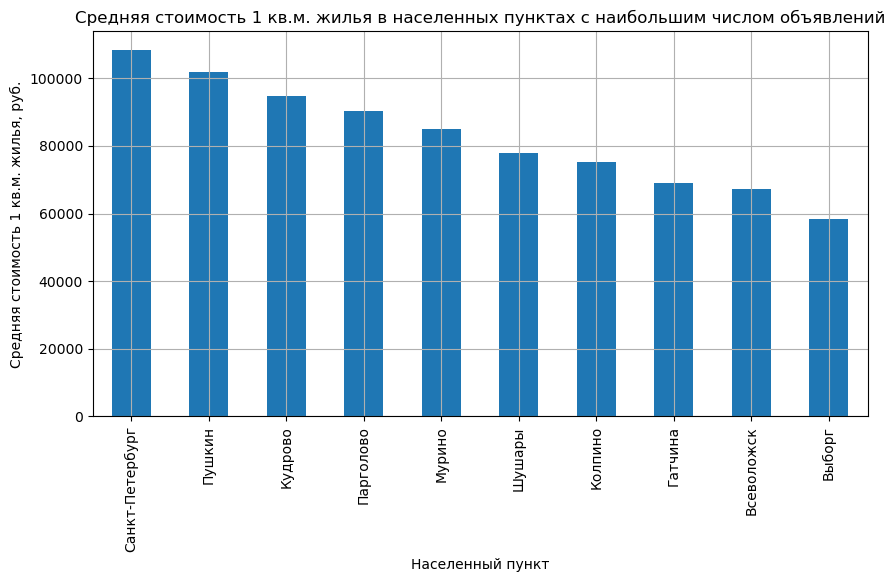

In [135]:
top_ten.sort_values('mean', ascending=False).plot(kind='bar', y='mean', grid=True, legend=False, figsize=(10,5))
plt.xlabel('Населенный пункт')
plt.ylabel('Средняя стоимость 1 кв.м. жилья, руб.')
plt.title('Средняя стоимость 1 кв.м. жилья в населенных пунктах с наибольшим числом объявлений')
plt.show()

Из 10 населенных пунктов с наибольшим количеством объявлений максимальная средняя стоимость одного квадратного метра наблюдается в Санкт-Петербурге (108417 рублей), минимальная - в Выборге (58461 рубля).

#### Задание: "Центр города"
Задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

Составим график медианной стоимости объектов от расстояние до центра города в Санкт-Петербурге.

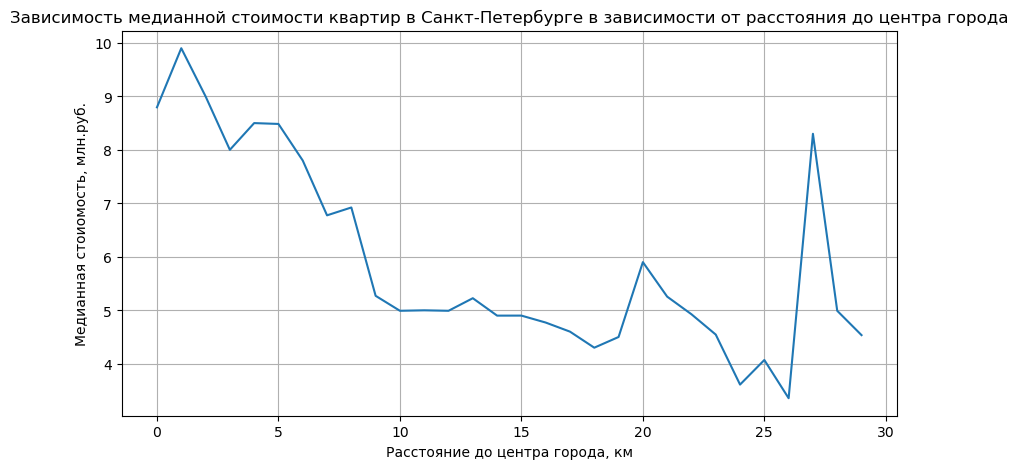

In [136]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price_mil', aggfunc='median').plot(y='last_price_mil', grid=True, legend=False, figsize=(10,5))
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Медианная стоиомость, млн.руб.')
plt.title('Зависимость медианной стоимости квартир в Санкт-Петербурге в зависимости от расстояния до центра города')
plt.show()

График показывает следующие закономерности:
- наибольшая медианная стоимость наблюдается у квартир, расположенных в самом центре Санкт-Петербурга (в пределах 2 км от центра города)
- по мере удаления от центра города медианная стоимость квартир снижается
- наблюдаются два пика стоимость у квартир, расположенных на расстоянии 20 и 26-27 км от центра Санкт-Петербурга, где, по всей вероятности, расположеные крупные новые районы Санкт-Петербурга

### Общий вывод

#### Введение
Исследовательский анализ данных сервиса Яндекс.Недвижимость проводился с целью выявления закономерностей и зависимостей, существующих на рынке недвижимости Санкт-Петербурга и Ленинградской области. Исходные данные представляли собой информацию о 23699 объявлениях и содержали данные двух типов: добавленные пользователем (общая информация о квартире, стоимость) и картографические (расстояние до ближайшего аэропорта, парка, водоема и до центра города).

#### Предобработка данных
Изучение исходных данных выявило наличие пропусков, аномальных значений и неявных дубликатов в данных.

##### Обработка аномальных значений
- столбец `'last_price'`: удалены строки со значениями цены выше 20 млн и меньше 1 млн
- столбец `'total_area'`: удалены строки со значениями  общей площади больше 250 кв.м.
- столбец `'rooms'`: проверено предположение о том, что в строках со значением количества комнат 0 находятся данные о квартирах-студиях. В тех строках, для которых предположение оказалось верным, количество комнат заменено на 1, оставшиеся строки удалены. Также удалены строки с количеством комнат больше 6.
- стобец `'ceiling_height'`: удалены строки со значениями высоты потолка больше 4 м и меньше 2,4 м. Восстановлены искаженные значения больше 24 м.
- столбец `'floors_total'`: удалены строки со значением этажа больше 37 (в силу отсутствия в рассматриваемых населенных пунктах жилых зданий высотой более 37 этажей)
- столбец `'living_area'`: удалены строки со значениями жилой площади меньше 6,8 кв.м. и больше 120 кв.м. (нижний порог устанавливался исходя из минимальной общей площади, верхний - путем выявления малого количества строк с редкими значениями)
- столбец `'kitchen_area'`: удалены строки со значениями площади кухни больше 40 кв.м. и меньше 5 кв.м.

##### Обработка пропусков
- столбец `'ceiling_height'`: пропуски заполнены медианным значением высоты потолка по столбцу
- столбец `'floors_total'`: строки с пропущенными значениями удалены
- столбец `'living_area'`: пропуски заполнены произведением общей площади квартиры и коэффициента жилой площади (рассчитан как медианное отношение жилой площади к общей по всей таблице)
- столбец `'is_apartment'`: пропущенные значения заменены на False
- столбец `'kitchen_area'`: пропуски заполнены произведением общей площади квартиры и коэффициента площади кухни (рассчитан как медианное отношение площади кухни к общей по всей таблице)
- столбец `'balcony'`: пропуски заменены на 0
- столбец `'locality_name'`: строки с пропущенными значениями удалены
- столбцы `'airports_nearest'`, `'cityCenters_nearest'`, `'parks_around3000'`, `'parks_nearest'`, `'ponds_around3000'`, `'ponds_nearest'`: предпринята попытка заполнения пропусков медианным значением соответствующего параметра по каждому населенному пункту, оставшиеся пропуски оставлены без обработки
- столбец `'days_exposition'`: пропуски оставлены без обработки

Таким образом, после удаления строк с пропусками и аномальными значениями в таблице осталось 22017 строк.

##### Изменение типов данных
- столбец `'first_day_exposition'`: тип данных изменен на формат datetime для дальнейшей обработки
- столбец `'floors_total'`: тип данных изменен на `int` для удобства восприятия
- столбец `'living_area'`: значения округлены до двух знаков после десятичной точки
- столбец `'floor'`: тип данных изменен на `int` для удобства восприятия 
- столбец `'balcony'`: тип данных изменен на `int` для удобства восприятия

##### Обработка неявных дубликатов
Изучение столбца `'locality_name'` выявило наличие ряда неявных дубликатов следующего характера: название населенного пункта указано одно и то же, а названия типа населенного пункта дублируются: "поселок" и "посёлок", "поселок" и "поселок городского типа" и т.д. Столбец обработан с помощью регулярного выражения, оставлены только наименования населенных пунктов без указания их типа.

##### Категоризация данных
- выделены три категории этажей: `'первый'`, `'последний'`, `'другой'`

#### Добавление столбцов
Добавлены следующие столбцы:
- `'price_per_square'` (цена одного квадратного метра жилья)
- `'exposition_weekday'` (день публикации объявления)
- `'exposition_month'` (месяц публикации объявления)
- `'exposition_year'` (год публикации объявления)
- `'floor_category'` (тип этажа квартиры)
- `'cityCenters_nearest_km'` (расстояние в км до центра города)
- `'last_price_mil'` (стоимость квартиры в млн. рублей)

#### Исследовательский анализ данных 
##### Изучение скорости продаж
Установлены медианный и средний срок продажи квартиры: 94 и 178 дней соответственно. Максимальный наблюдаемый период продажи составляет 1580 дней (больше 4 лет), минимальный - 1 день.
Необычно долгими решено считать продажи, длительность которых превышает 1 год.

##### Изучение влияния различных факторов на полную стоимость квартиры
Была изучена взаимосвзяь полной стоимости квартиры и следующих параметров:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- типа этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год)
  
Проведенный анализ показывает, что без учета времени размещения объявления степень влияния параметров на стоимость распределяется следующим образом (по уменьшению):
- общая площадь (коэффициент корреляции 0,77)
- жилая площадь (коэффициент корреляции 0,66)
- площадь кухни (коэффициент корреляции 0,58)
- количество комнат (коэффициент корреляции 0,49)

Наиболее значимой величиной при определении стоимости квартиры является ее общая площадь.

Что касается временных характеристик, то можно выделить следующие закономерности в зависимости от времени публикации объявления:
- день недели: максимальная стоимость - вторник, минимальная - воскресенье
- месяц: максимальная стоимость - апрель, минимальная - июнь
- год: максимальная стоимость - 2014 г., минимальная - 2016-2017 гг.

##### Определение средней цены одного квадратного метра жилья в 10 городах с наибольшим количеством объявлений
Из 10 населенных пунктов с наибольшим количеством объявлений максимальная средняя стоимость одного квадратного метра наблюдается в Санкт-Петербурге (108417 рублей), минимальная - в Выборге (58461 рубля).

##### Изучение зависимости стоимости квартиры от расположения относительно центра города в Санкт-Петербурге
Наибольшая медианная стоимость квартир в Санкт-Петербурге наблюдается у квартир, расположенных в пределах до 2 км от центра города (около 10 млн. рублей). Далее по мере отдаления от центра медианная стоимость квартир снижается. Наблюдаются два пика стоимости у квартир, расположенных на расстоянии 20 и 26-27 км от центра Санкт-Петербурга (около 6 и 8,2 млн. рублей соответственно).

##### Итого
Выявлено, что основным фактором, влияющим на стоимость квартиры, является ее общая площадь.

Полученные данные могут использоваться для построения моделей, предсказывающих стоимость квартиры по набору параметров, а также для отслеживания аномальных объявлений.